In [1]:
%matplotlib inline
import re
import math, time, random, datetime
import numpy as np
import pandas as pd 
import json
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import statsmodels.api as sm
import catboost
import graphviz
import joblib
import tensorflow as tf
#import imblearn as ibn
#from imblearn.over_sampling import RandomOverSampler
from math import floor
from scipy import stats
from sklearn import set_config, preprocessing, model_selection, tree
from statsmodels.tools import add_constant as add_constant
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from flask import Flask, request, jsonify
warnings.filterwarnings("ignore")
sns.set_theme
sns.set_palette('colorblind')
plt.style.use('seaborn-whitegrid')

In [2]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/banana.csv'
bananas= pd.read_csv(path)
bananas.to_csv('bananas.csv')
bananas.shape

(12488, 7)

In [3]:
bananas.isnull().sum()*100/len(bananas)

Plant          0.0
N              0.0
P              0.0
K              0.0
pH             0.0
Rainfall       0.0
Temperature    0.0
dtype: float64

In [4]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/bean.csv'
beans = pd.read_csv(path)
beans.to_csv('bean.csv')
beans.shape

(20010, 7)

In [5]:
beans.isnull().sum()*100/len(beans)

Plant          0.0
N              0.0
P              0.0
K              0.0
pH             0.0
Rainfall       0.0
Temperature    0.0
dtype: float64

In [6]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/cacao.csv'
cacaos = pd.read_csv(path)
cacaos.to_csv('cacao.csv')
cacaos.shape

(33340, 7)

In [7]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/cassava.csv'
cassavas = pd.read_csv(path)
cassavas.to_csv('cassava.csv')
cassavas.shape

(69360, 7)

In [8]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/chilli-pepper.csv'
chilli = pd.read_csv(path)
chilli.to_csv('chilli-pepper.csv')
chilli.shape

(6230, 7)

In [9]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/coffee.csv'
coffees = pd.read_csv(path)
coffees.to_csv('coffee.csv')
coffees.shape

(86697, 7)

In [10]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/fruit-tree.csv'
fruits = pd.read_csv(path)
fruits.to_csv('fruit-tree.csv')
fruits.shape

(9352, 7)

In [11]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/laituce.csv'
laituces = pd.read_csv(path)
laituces.to_csv('laituce.csv')
laituces.shape

(66675, 7)

In [12]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/maize.csv'
maizes = pd.read_csv(path)
maizes.to_csv('maize.csv') 
maizes.shape

(3136, 7)

In [13]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/okra.csv'
okras = pd.read_csv(path)
okras.to_csv('okra.csv') 
okras.shape

(13344, 7)

In [14]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/onion.csv'
onions = pd.read_csv(path)
onions.to_csv('onion.csv')
onions.shape

(13380, 7)

In [15]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/palm-tree.csv'
palms = pd.read_csv(path)
palms.to_csv('palm-tree.csv')
palms.shape

(18676, 7)

In [16]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/peanut.csv'
peanuts = pd.read_csv(path)
peanuts.to_csv('peanut.csv')
peanuts.shape

(16000, 7)

In [17]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/pineaple.csv'
pineaples = pd.read_csv(path)
pineaples.to_csv('pineaple.csv')
pineaples.shape

(8004, 7)

In [18]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/potato.csv'
potatos = pd.read_csv(path)
potatos.to_csv('potato.csv')
potatos.shape

(18672, 7)

In [19]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/rice.csv'
rices = pd.read_csv(path)
rices.to_csv('rice.csv')
rices.shape

(155680, 7)

In [20]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/sorghum.csv'
sorghums = pd.read_csv(path)
sorghums.to_csv('sorghum.csv')
sorghums.shape

(2676, 7)

In [21]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/sugarcane.csv'
sugarcanes = pd.read_csv(path)
sugarcanes.to_csv('sugarcane.csv')
sugarcanes.shape

(25576, 7)

In [22]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/tea.csv'
teas = pd.read_csv(path)
teas.to_csv('tea.csv')
teas.shape

(140004, 7)

In [23]:
# path of data 
path = 'C:/Users/nsond/Desktop/memoire/tomato.csv'
tomatos = pd.read_csv(path)
tomatos.to_csv('tomato.csv')
tomatos.shape

(17034, 7)

## Fusion par la méthode merge de pandas

In [92]:
# Merging 20 csv files
Datamerge = pd.concat([bananas, beans, cacaos, cassavas, chilli, coffees, fruits, laituces, maizes, okras, onions, 
                       palms, peanuts, pineaples, potatos, rices, sorghums, sugarcanes, teas, tomatos], axis=0, ignore_index=True)

L'opération de fusion de 20 fichiers CSV distincts a été entreprise dans le but de consolider ces données en une seule source cohérente, simplifiant ainsi les travaux ultérieurs de traitement, d'analyse et de prédiction. Il est important de noter que toutes les bases de données initiales présentent la particularité d'avoir le même nombre de variables ainsi que les mêmes noms de variables, ce qui a facilité cette opération de fusion.

Le processus de fusion des bases de données a été réalisé à l'aide de la bibliothèque pandas en Python, en utilisant la fonction `concat`. Cette fonction permet de concaténer verticalement (le long de l'axe 0) les données provenant des 20 fichiers CSV, créant ainsi un nouveau DataFrame consolidé appelé `Datamerge`.

Cette opération de fusion a apporté plusieurs avantages à l'étude. Tout d'abord, elle a permis de regrouper l'ensemble des données de manière à ce qu'elles soient plus facilement accessibles et gérables. Ensuite, elle a éliminé la nécessité de travailler avec 20 ensembles de données distincts, simplifiant ainsi considérablement notre flux de travail. Enfin, elle a créé une base de données unique, cohérente et homogène, prête à être exploitée pour nos futures analyses et prédictions.

Cette approche de fusion de données est couramment utilisée dans la recherche et l'analyse de données, permettant de rationaliser le processus de manipulation des données et d'obtenir des résultats plus efficacement. Elle constitue une étape fondamentale pour garantir la qualité et la pertinence des analyses ultérieures, tout en optimisant l'utilisation des ressources et du temps de travail.

## Description de la base

In [78]:
Datamerge.shape

(736334, 7)

In [79]:
Datamerge.head(5)

,Plant,N,P,K,pH,Rainfall,Temperature
0,bananas,250,10,100,6.0,1200.0,15.0
1,bananas,250,10,100,6.0,1200.0,15.9
2,bananas,250,10,100,6.0,1200.0,16.8
3,bananas,250,10,100,6.0,1200.0,17.7
4,bananas,250,10,100,6.0,1200.0,18.6


In [80]:
Datamerge.tail(5)

,Plant,N,P,K,pH,Rainfall,Temperature
736329,tomatos,50,130,250,6.8,999.7,30.8
736330,tomatos,50,130,250,6.8,999.7,31.7
736331,tomatos,50,130,250,6.8,999.7,32.6
736332,tomatos,50,130,250,6.8,999.7,33.5
736333,tomatos,50,130,250,6.8,999.7,34.4


<AxesSubplot:>

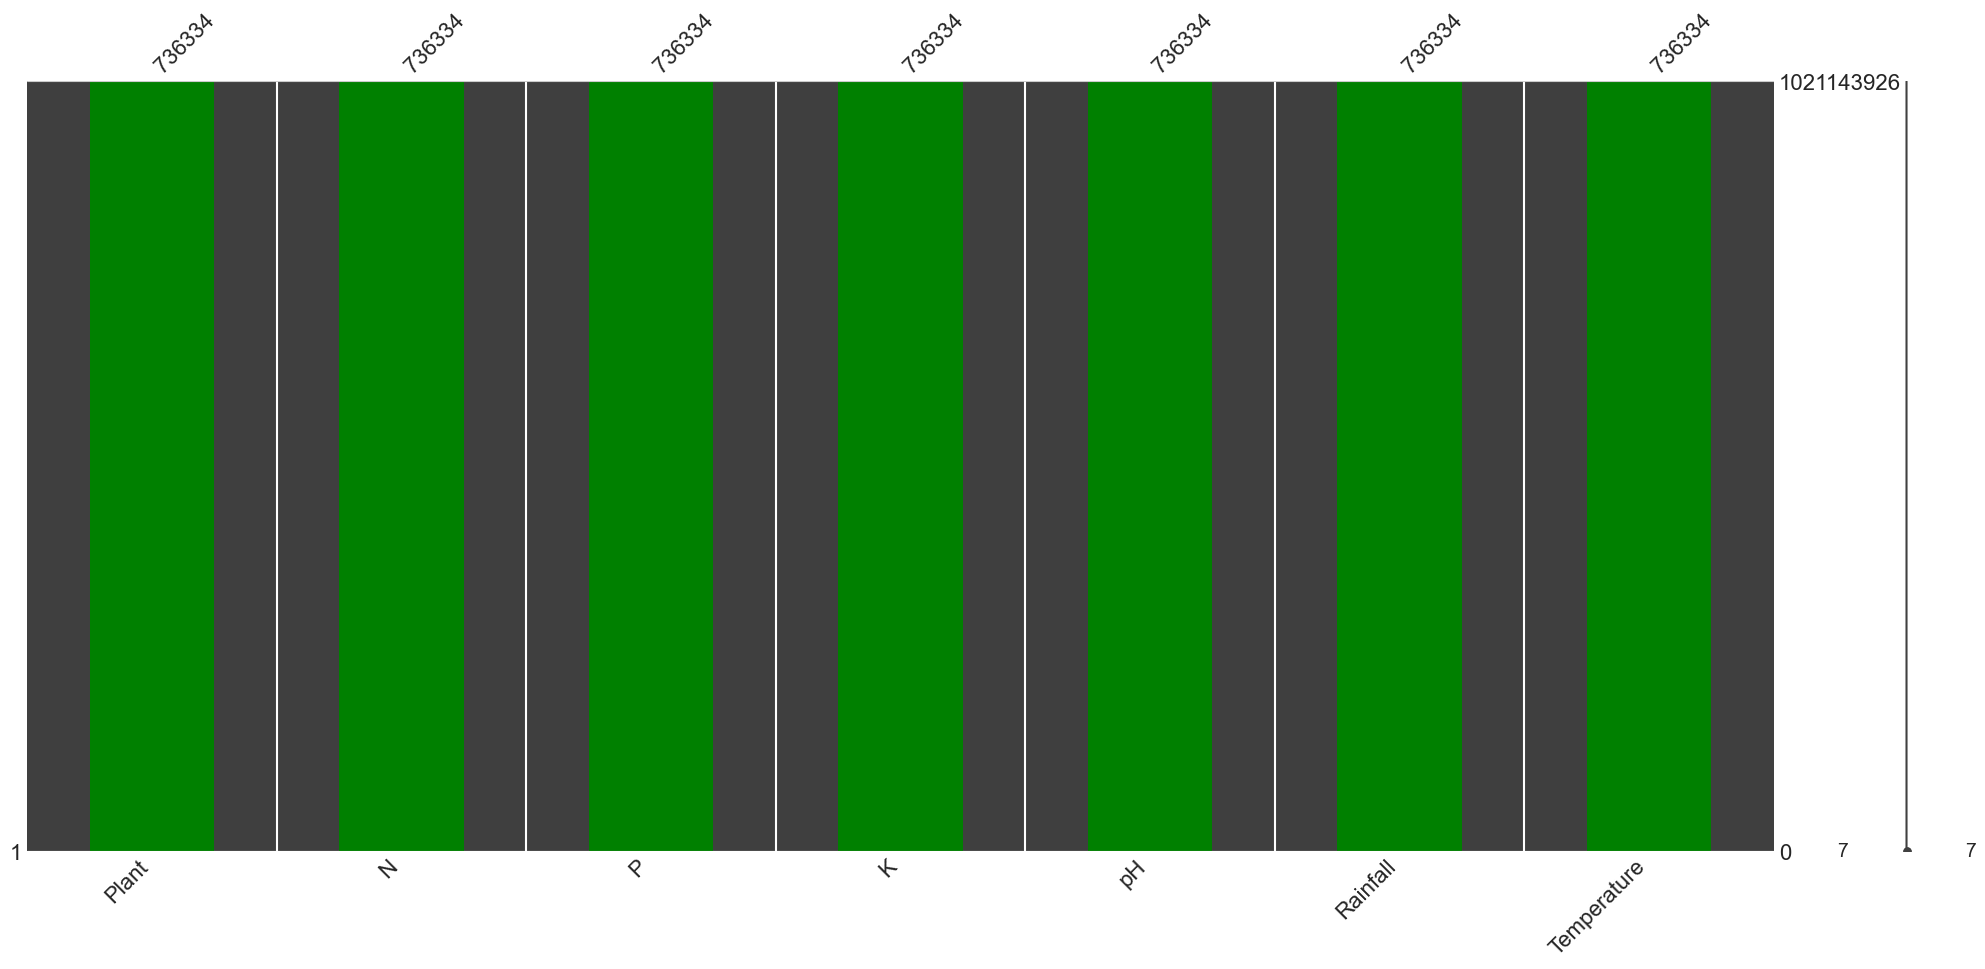

In [81]:
msno.matrix(Datamerge,  figsize = (50, 20))
msno.bar(Datamerge, color = "green")

En analysant ce tableau, il est à noter qu'aucune donnée manquante n'est présente parmi les différentes variables. Chacune de ces variables contient 736,334 observations, et en additionnant le nombre total d'observations à travers ces variables, nous obtenons un total de 1,021,143,926 observations au total.

In [82]:
subset_duplicate_rows = Datamerge[Datamerge.duplicated(subset=['N', 'P', 'K', 'pH'])]

# Pour afficher les doublons basés sur les colonnes spécifiques
print("Doublons basés sur les colonnes spécifiques :")
print(subset_duplicate_rows)

Doublons basés sur les colonnes spécifiques :
          Plant    N    P    K   pH  Rainfall  Temperature
1       bananas  250   10  100  6.0    1200.0         15.9
2       bananas  250   10  100  6.0    1200.0         16.8
3       bananas  250   10  100  6.0    1200.0         17.7
4       bananas  250   10  100  6.0    1200.0         18.6
5       bananas  250   10  100  6.0    1200.0         19.5
...         ...  ...  ...  ...  ...       ...          ...
736329  tomatos   50  130  250  6.8     999.7         30.8
736330  tomatos   50  130  250  6.8     999.7         31.7
736331  tomatos   50  130  250  6.8     999.7         32.6
736332  tomatos   50  130  250  6.8     999.7         33.5
736333  tomatos   50  130  250  6.8     999.7         34.4

[736290 rows x 7 columns]


## Pré-traitement

## Statistiques descriptives

In [83]:
stats = Datamerge.describe(include=[object])
stats.index.name = 'Statistiques'
print(stats)

               Plant
Statistiques        
count         736334
unique            20
top             rice
freq          155680


In [84]:
Datamerge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,736334.0,50.430366,54.297312,5.0,16.0,20.0,60.0,250.0
P,736334.0,20.004499,23.030196,3.0,10.0,10.0,30.0,130.0
K,736334.0,59.822939,56.386849,10.0,20.0,50.0,60.0,250.0
pH,736334.0,5.528704,1.322511,3.0,4.8,5.8,6.8,7.9
Rainfall,736334.0,1747.613486,962.855949,400.0,1126.0,1478.7,1979.7,4999.2
Temperature,736334.0,25.023192,6.291149,10.0,20.4,24.9,30.1,39.3


Dans l'analyse statistique présente, plusieurs caractéristiques liées aux données ont été examinées, fournissant des informations essentielles pour la compréhension de la composition du jeu de données. Les statistiques suivantes ont été interprétées :

- Azote (N) : La concentration moyenne d'azote dans les échantillons est d'environ 50.43 unités, avec une variation substantielle allant de 5 à 250 unités. Les valeurs centrales (25%, 50%, 75%) indiquent que la plupart des données se situent dans la plage de 16 à 60 unités.

- Phosphore (P) : La concentration moyenne de phosphore est d'environ 20.00 unités, avec des valeurs variant de 3 à 130 unités. La majorité des échantillons se trouve dans la fourchette de 10 à 30 unités.

- Potassium (K) : La concentration moyenne de potassium est d'environ 59.82 unités, avec une plage allant de 10 à 250 unités. Les valeurs centrales suggèrent que la plupart des observations se situent entre 20 et 60 unités.

- pH : Le pH moyen est d'environ 5.53, avec une plage de 3.0 (acide) à 7.9 (légèrement basique). La plupart des échantillons affichent un pH compris entre 4.8 et 6.8, indiquant une légère inclination vers la neutralité.

- Précipitations (Rainfall) : Les précipitations moyennes sont d'environ 1747.61 unités, avec une variation notable de 400.0 à 4999.2 unités. Cela révèle des différences significatives dans les niveaux de précipitations au sein de l'échantillon.

- Température (Temperature) : La température moyenne est d'environ 25.02 degrés, avec une plage de 10.0 à 39.3 degrés. Les valeurs centrales indiquent que la plupart des observations se situent entre 20.4 et 30.1 degrés, reflétant des conditions relativement tempérées.

Ces statistiques fournissent un aperçu des caractéristiques des données. Par exemple, la concentration d'azote varie considérablement, tandis que le pH reste généralement stable. Les données sur les précipitations et la température montrent également des variations significatives, pouvant influencer les analyse ultérieure.

In [85]:
%pwd

'C:\\Users\\nsond\\Desktop\\stageP'

In [86]:
from IPython.display import FileLink
chemin_du_fichier = 'memorie.docx'
lien_de_telechargement = FileLink('C:/Users/nsond/Desktop/stageP/memorie.ipynb')
lien_de_telechargement

C:\Users\nsond\Desktop\stageP\memorie.ipynb

In [87]:
Datamerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736334 entries, 0 to 736333
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Plant        736334 non-null  object 
 1   N            736334 non-null  int64  
 2   P            736334 non-null  int64  
 3   K            736334 non-null  int64  
 4   pH           736334 non-null  float64
 5   Rainfall     736334 non-null  float64
 6   Temperature  736334 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 39.3+ MB


Le DataFrame Datamerge présente une structure tabulaire avec un index Int64Index, qui identifie chaque ligne par un entier allant de 0 à 736,333. Il comprend sept colonnes distinctes, chacune caractérisant une variable spécifique. Parmi ces variables, "Plant" est de nature catégorielle, décrivant les types de plantes ou de cultures. Les colonnes "N," "P," et "K" sont numériques (int64) et quantifient respectivement les niveaux d'azote, de phosphore, et de potassium dans le sol. La colonne "pH" est également numérique (float64) et indique le pH du sol. Les deux dernières colonnes, "Rainfall" et "Temperature," sont numériques (float64) et enregistrent les précipitations en millimètres et la température en degrés Celsius.

Toutes les colonnes affichent un "Non-Null Count" indiquant qu'aucune valeur n'est manquante, assurant ainsi l'intégrité des données. Les types de données (int64, float64, object) pour chaque colonne sont explicités. La mémoire utilisée pour stocker ce DataFrame est d'environ 44.9+ mégaoctets (MB).

In [88]:
Datamerge['Plant'].value_counts(normalize = True)

rice             0.211426
tea-plant        0.190137
coffee           0.117741
cassava          0.094196
laituce          0.090550
cacao            0.045278
sugarcane        0.034734
bean             0.027175
palm-tree        0.025363
potatos          0.025358
tomatos          0.023134
peanut           0.021729
onion            0.018171
okra             0.018122
bananas          0.016960
fruit tree       0.012701
pineaple         0.010870
chilli-pepper    0.008461
maize            0.004259
sorghum          0.003634
Name: Plant, dtype: float64

Les données présentées illustrent la répartition des cultures agricoles au sein de la base de données fusionnée, exprimée en pourcentage. Cette répartition permet d'obtenir un aperçu de la diversité des cultures dans notre échantillon agricole. Voici une analyse détaillée de ces chiffres :

1. **Riz (rice) - 21,14 % :** Le riz est prédominant, représentant plus de 21 % de toutes les cultures enregistrées. Cela indique que le riz est la culture la plus répandue dans notre base de données.

2. **Thé (tea-plant) - 19,01 % :** Le thé constitue une part significative, atteignant près de 19 % de la répartition totale, ce qui en fait la deuxième culture la plus fréquente.

3. **Café (coffee) - 11,77 % :** Le café est bien représenté, bien qu'il soit moins courant que le riz et le thé, avec environ 11,77 % de la répartition.

4. **Manioc (cassava) - 9,42 % :** Le manioc suit de près, contribuant à environ 9,42 % de l'ensemble des cultures. Il s'agit d'une culture importante dans notre échantillon.

5. **Laitue (laituce) - 9,05 % :** La laitue est également fréquemment cultivée, représentant environ 9,05 % de l'ensemble.

6. **Cacao (cacao) - 4,53 % :** Le cacao est moins courant que les cultures précédentes, contribuant à environ 4,53 % de la répartition.

7. **Canne à sucre (sugarcane) - 3,47 % :** La canne à sucre représente environ 3,47 % de toutes les cultures.

8. **Haricot (bean) - 2,72 % :** Les haricots contribuent à hauteur d'environ 2,72 % de l'ensemble des cultures.

9. **Palmier à huile (palm-tree) - 2,54 % :** Le palmier à huile est cultivé à hauteur d'environ 2,54 %.

10. **Pommes de terre (potatos) - 2,53 % :** Les pommes de terre sont également bien présentes, avec environ 2,53 % de la répartition.

11. **Tomates (tomatos) - 2,31 % :** Les tomates contribuent à environ 2,31 % de toutes les cultures.

12. **Arachide (peanut) - 2,17 % :** Les arachides représentent environ 2,17 % de l'ensemble.

13. **Oignon (onion) - 1,82 % :** Les oignons sont cultivés à hauteur d'environ 1,82 %.

14. **Gombo (okra) - 1,81 % :** Le gombo contribue à environ 1,81 % de la répartition.

15. **Bananes (bananas) - 1,70 % :** Les bananes représentent environ 1,70 % de toutes les cultures.

16. **Arbres fruitiers (fruit tree) - 1,27 % :** Les arbres fruitiers contribuent à hauteur d'environ 1,27 % de l'ensemble.

17. **Ananas (pineaple) - 1,09 % :** Les ananas sont cultivés à hauteur d'environ 1,09 %.

18. **Piment (chilli-pepper) - 0,85 % :** Le piment contribue à environ 0,85 % de la répartition.

19. **Maïs (maize) - 0,43 % :** Le maïs est moins courant, représentant seulement environ 0,43 %.

20. **Sorgho (sorghum) - 0,36 % :** Le sorgho est la culture la moins répandue dans notre base de données, avec une contribution d'environ 0,36 %.

Ces pourcentages offrent une vue d'ensemble de la variété des cultures agricoles dans notre échantillon, ce qui peut s'avérer précieux pour l'analyse des tendances agricoles et la prise de décision dans le secteur agricole.

In [89]:
Datamerge.dtypes.value_counts()

int64      3
float64    3
object     1
dtype: int64

In [90]:
Datamerge.head()

,Plant,N,P,K,pH,Rainfall,Temperature
0,bananas,250,10,100,6.0,1200.0,15.0
1,bananas,250,10,100,6.0,1200.0,15.9
2,bananas,250,10,100,6.0,1200.0,16.8
3,bananas,250,10,100,6.0,1200.0,17.7
4,bananas,250,10,100,6.0,1200.0,18.6


## Visualisation des données

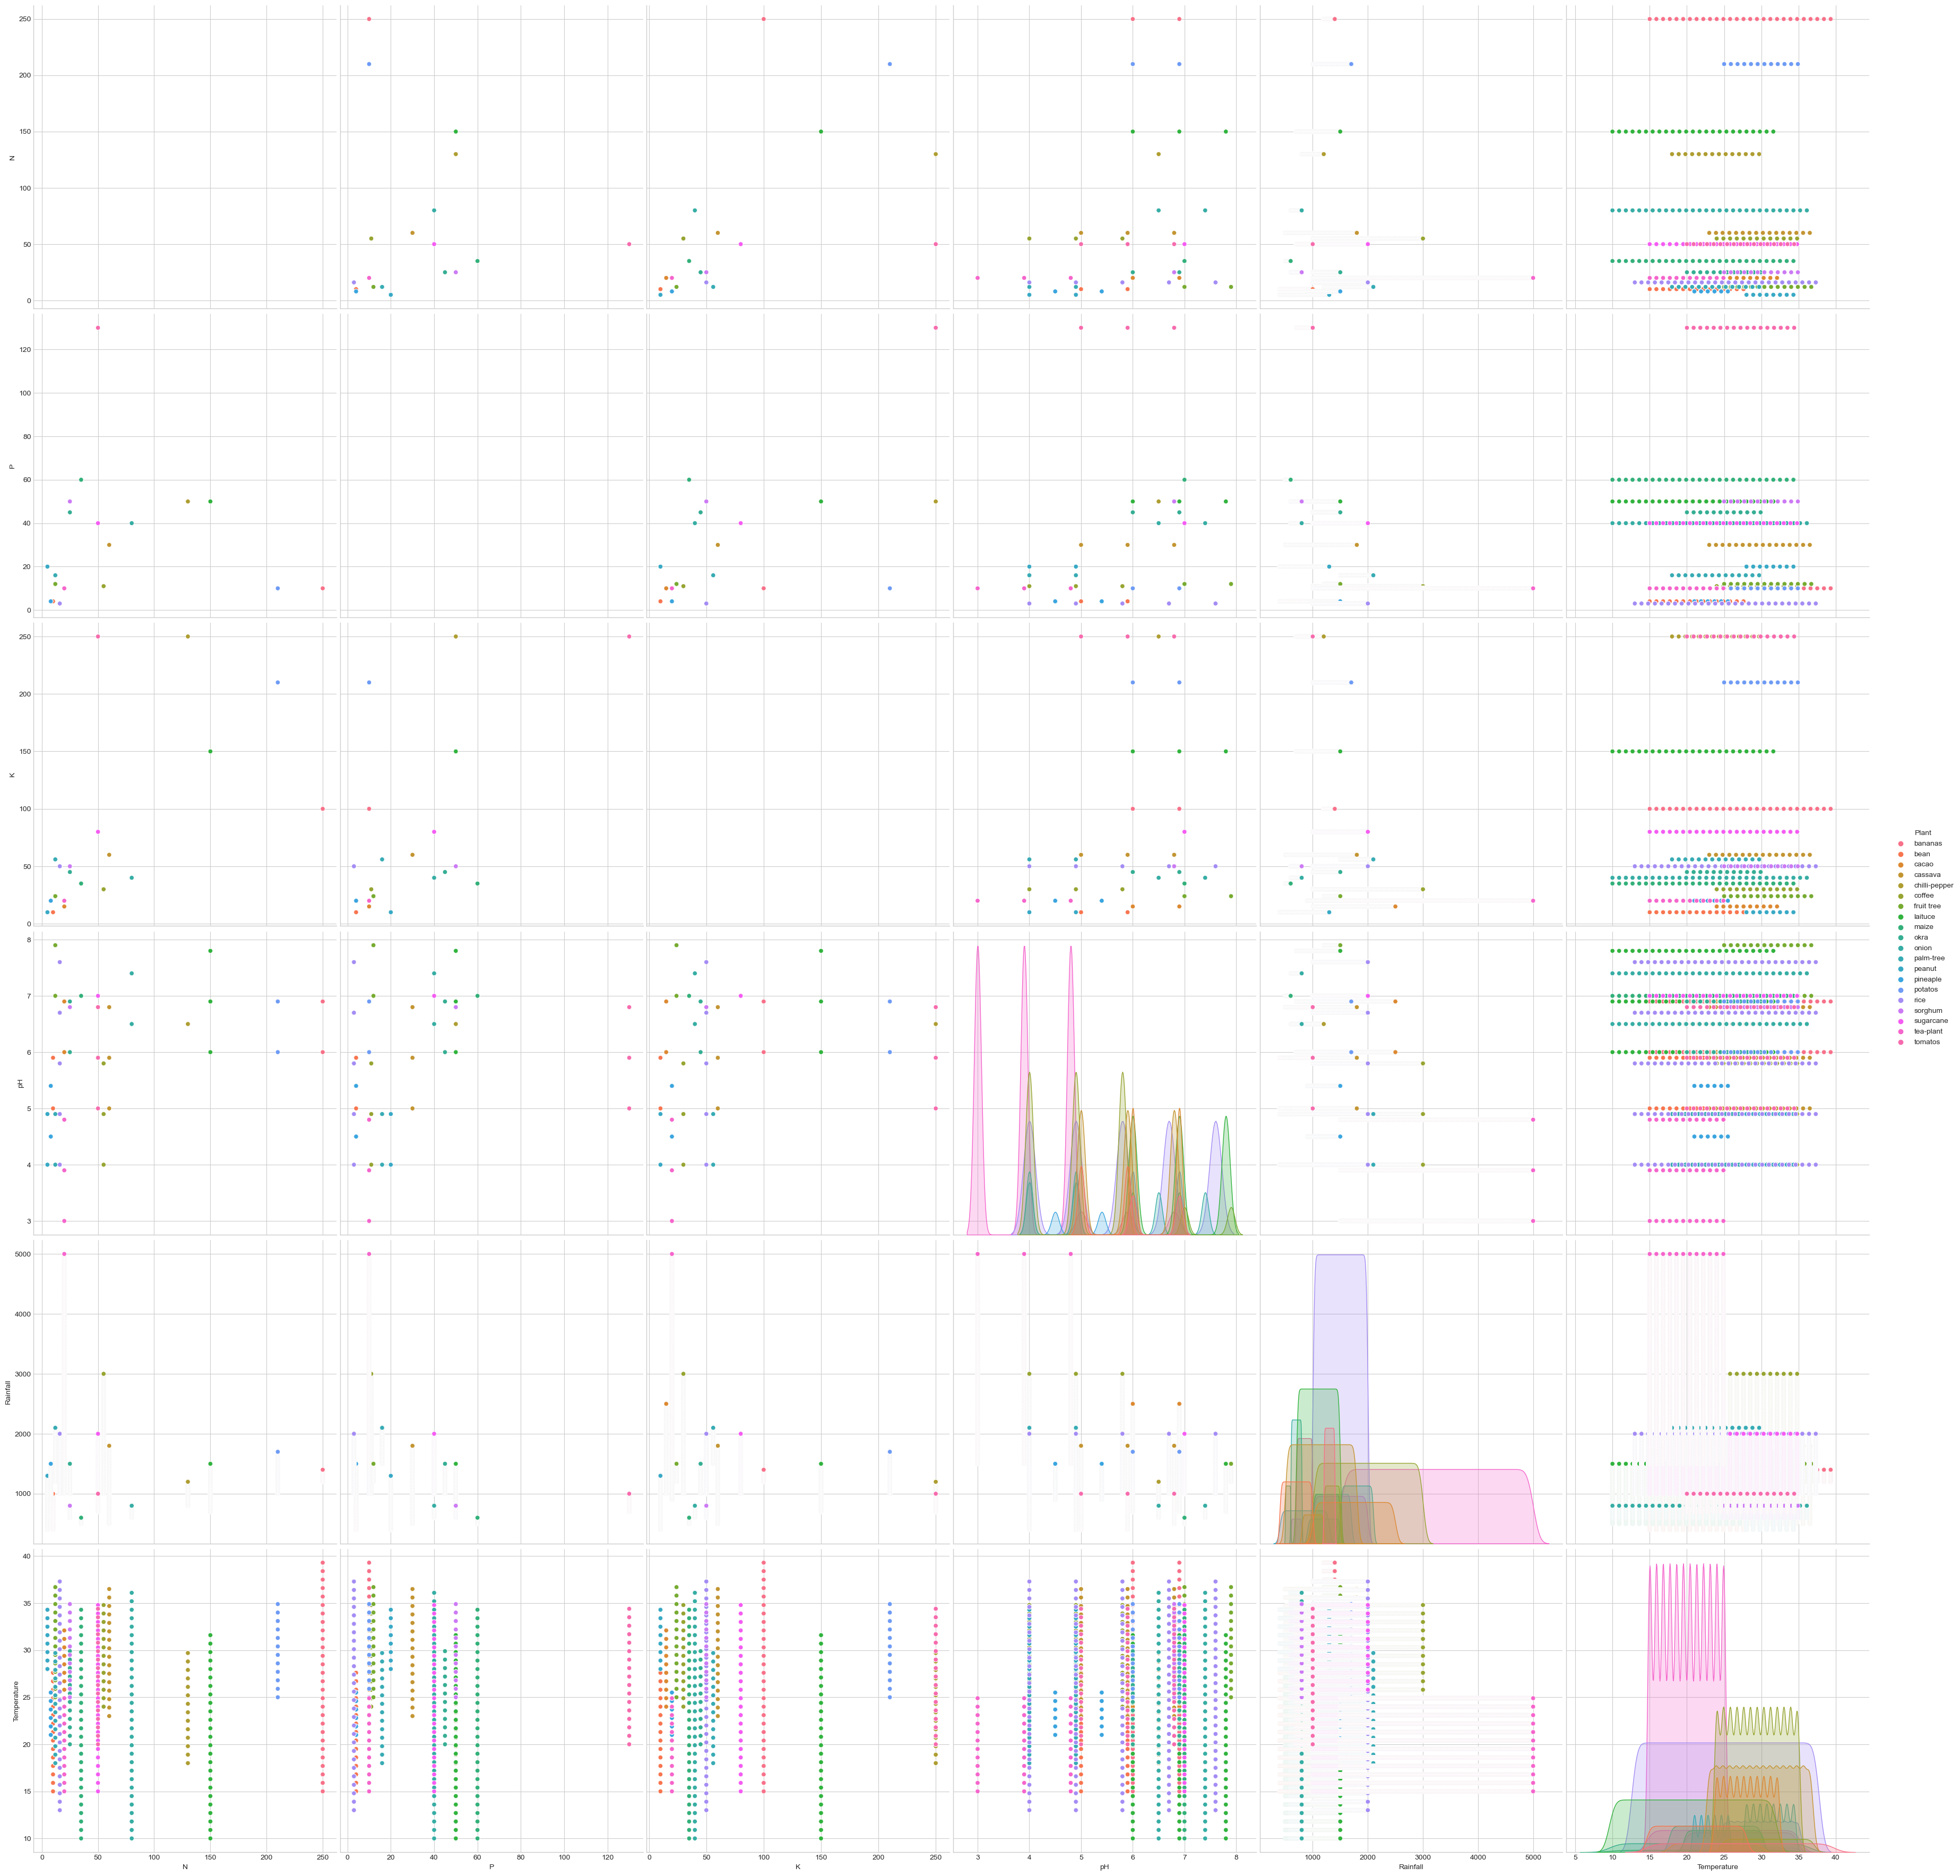

In [91]:
sns.pairplot(Datamerge, hue = 'Plant', height=6)
plt.show()

Text(0.5, 1.0, 'Visualisation de types de cultures en fonction des précipitations')

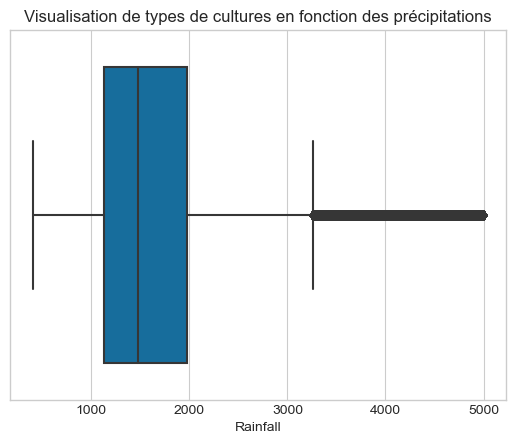

In [93]:
sns.boxplot( x = 'Rainfall', data = Datamerge, hue = 'Plant')
plt.title("Visualisation de types de cultures en fonction des précipitations")

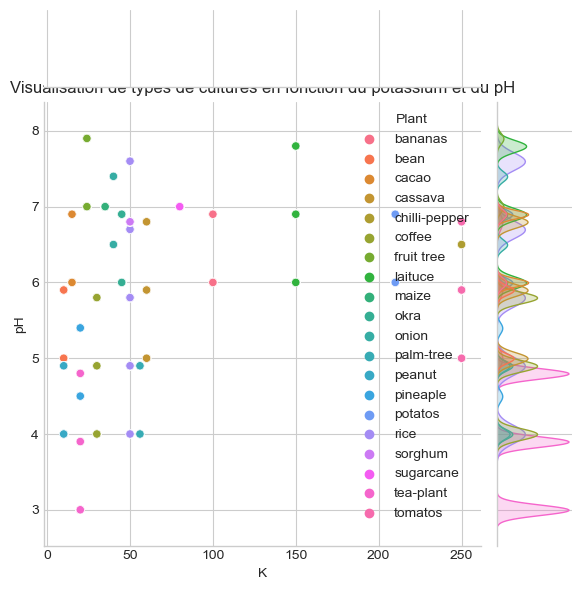

In [94]:
sns.jointplot(data = Datamerge, x = 'K', y= 'pH', hue = 'Plant')
plt.title("Visualisation de types de cultures en fonction du potassium et du pH")
plt.show()

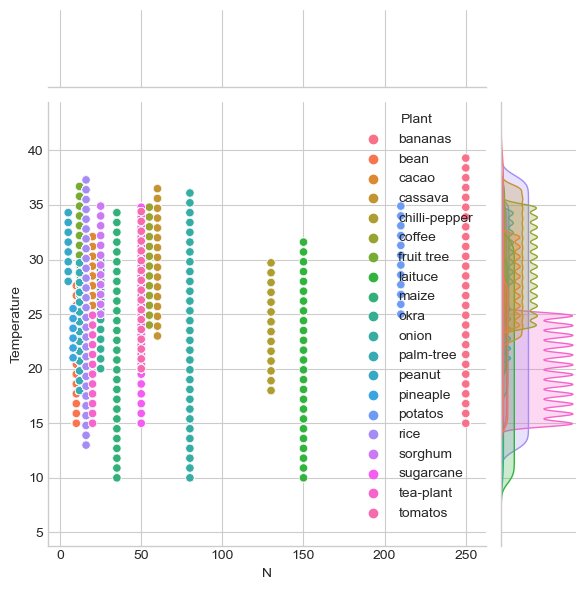

In [95]:
sns.jointplot(data = Datamerge, x = 'N', y= 'Temperature', hue = 'Plant')

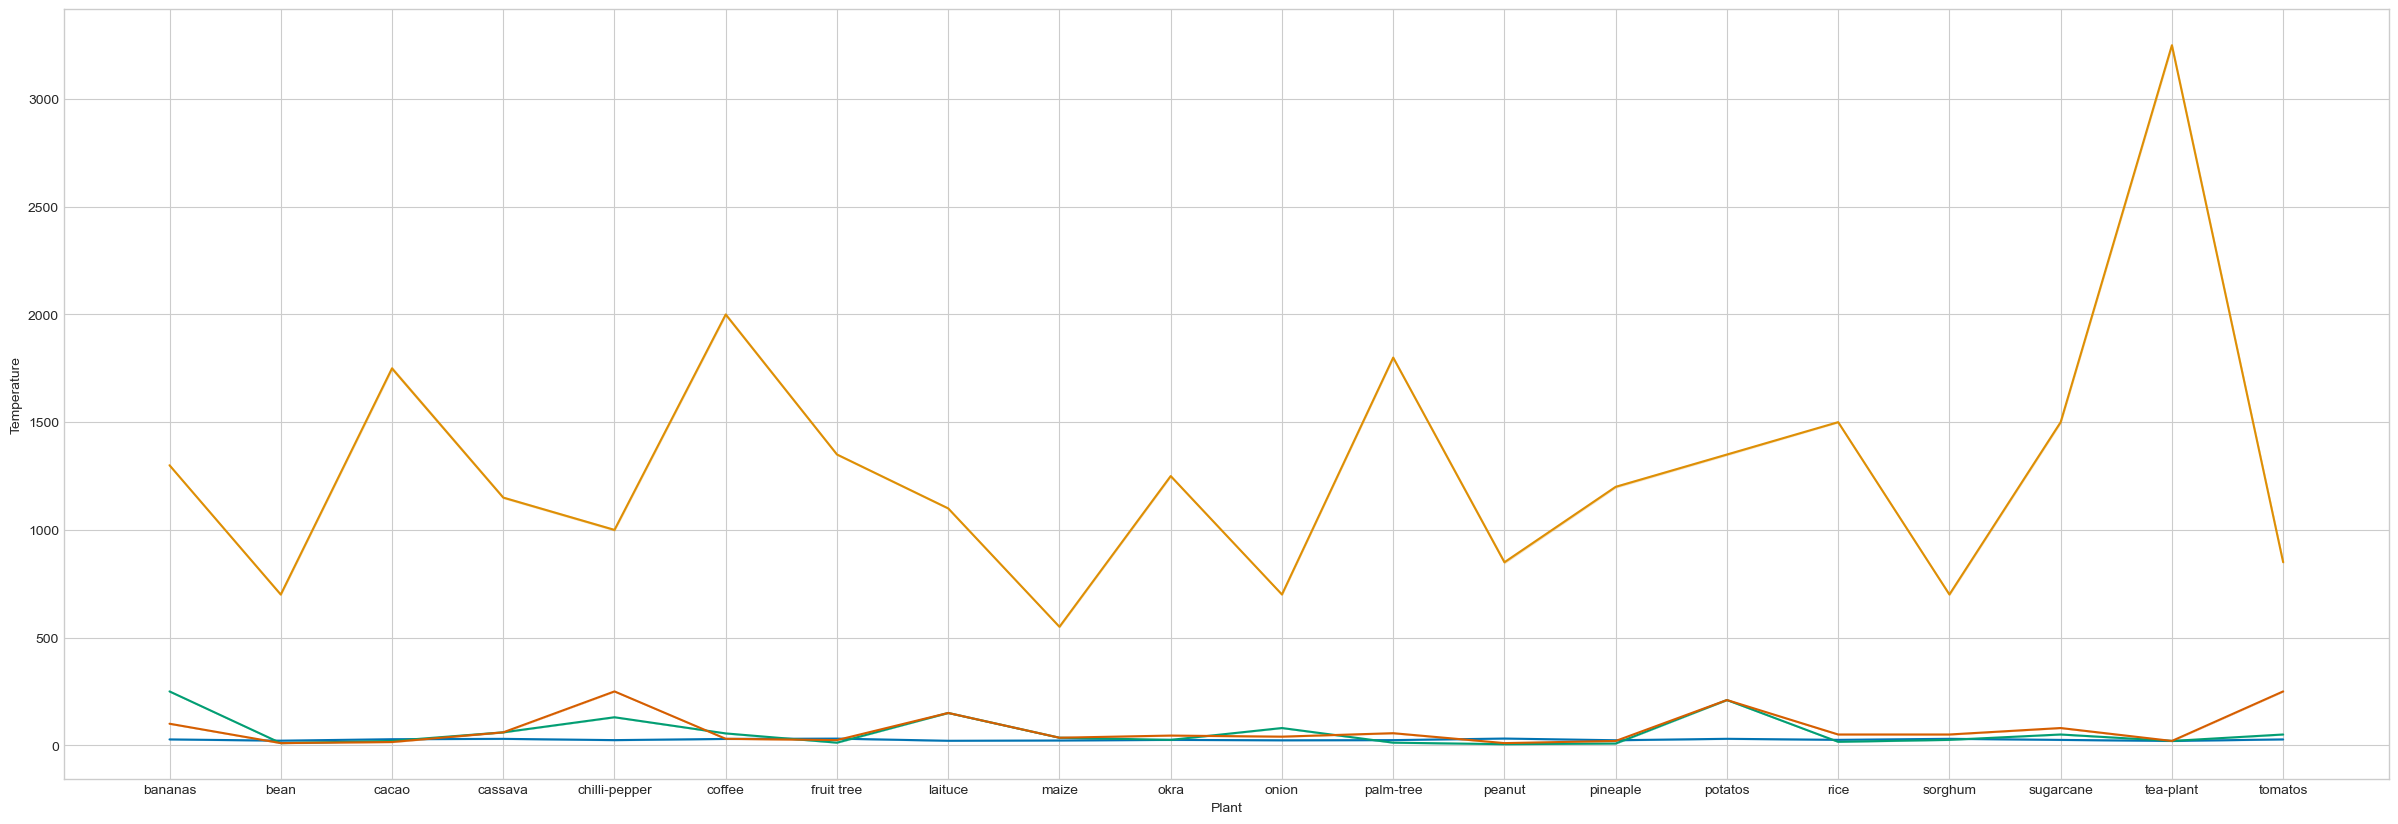

In [96]:
plt.figure(figsize =(30,10))
sns.lineplot(x = 'Plant', y='Temperature', data=Datamerge)
sns.lineplot(x = 'Plant', y='Rainfall', data=Datamerge)
sns.lineplot(x = 'Plant', y='N', data=Datamerge)
sns.lineplot(x = 'Plant', y='K', data=Datamerge)
plt.show()

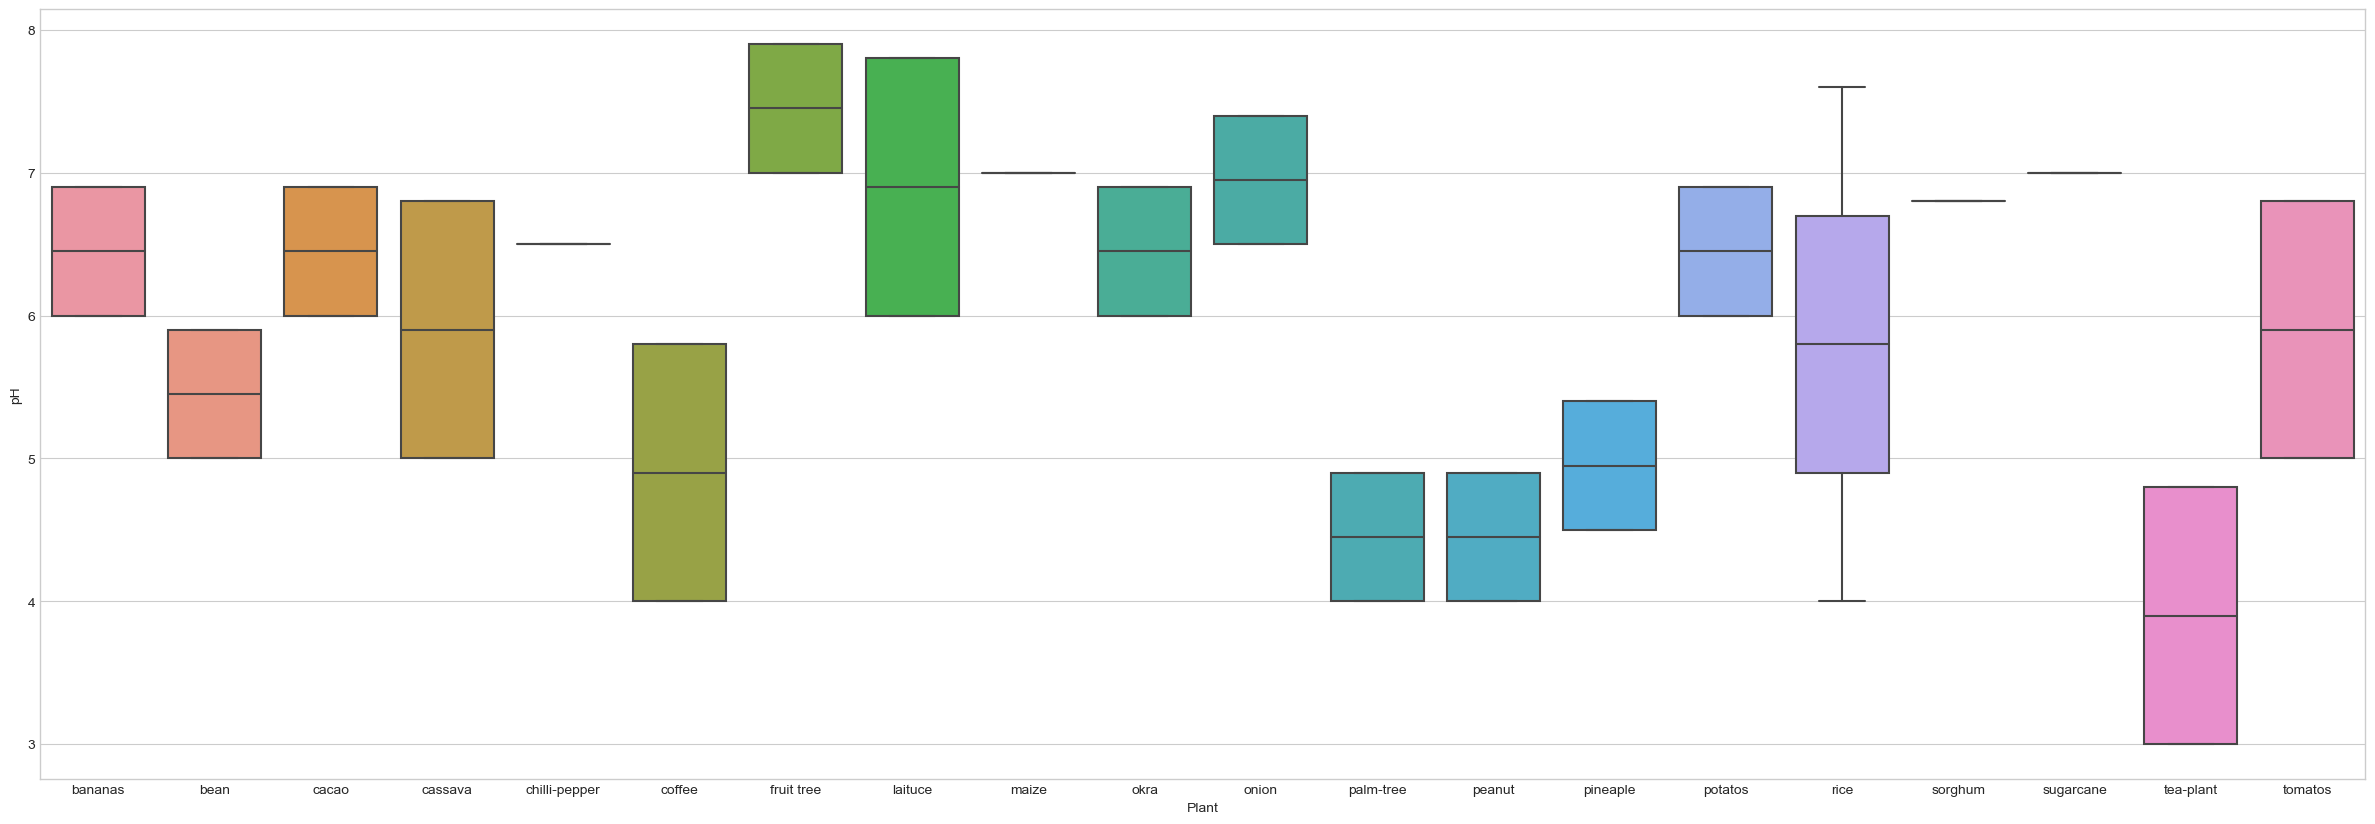

In [97]:
plt.figure(figsize =(30,10))
sns.boxplot(x='Plant', y ='pH', data= Datamerge)
plt.show()

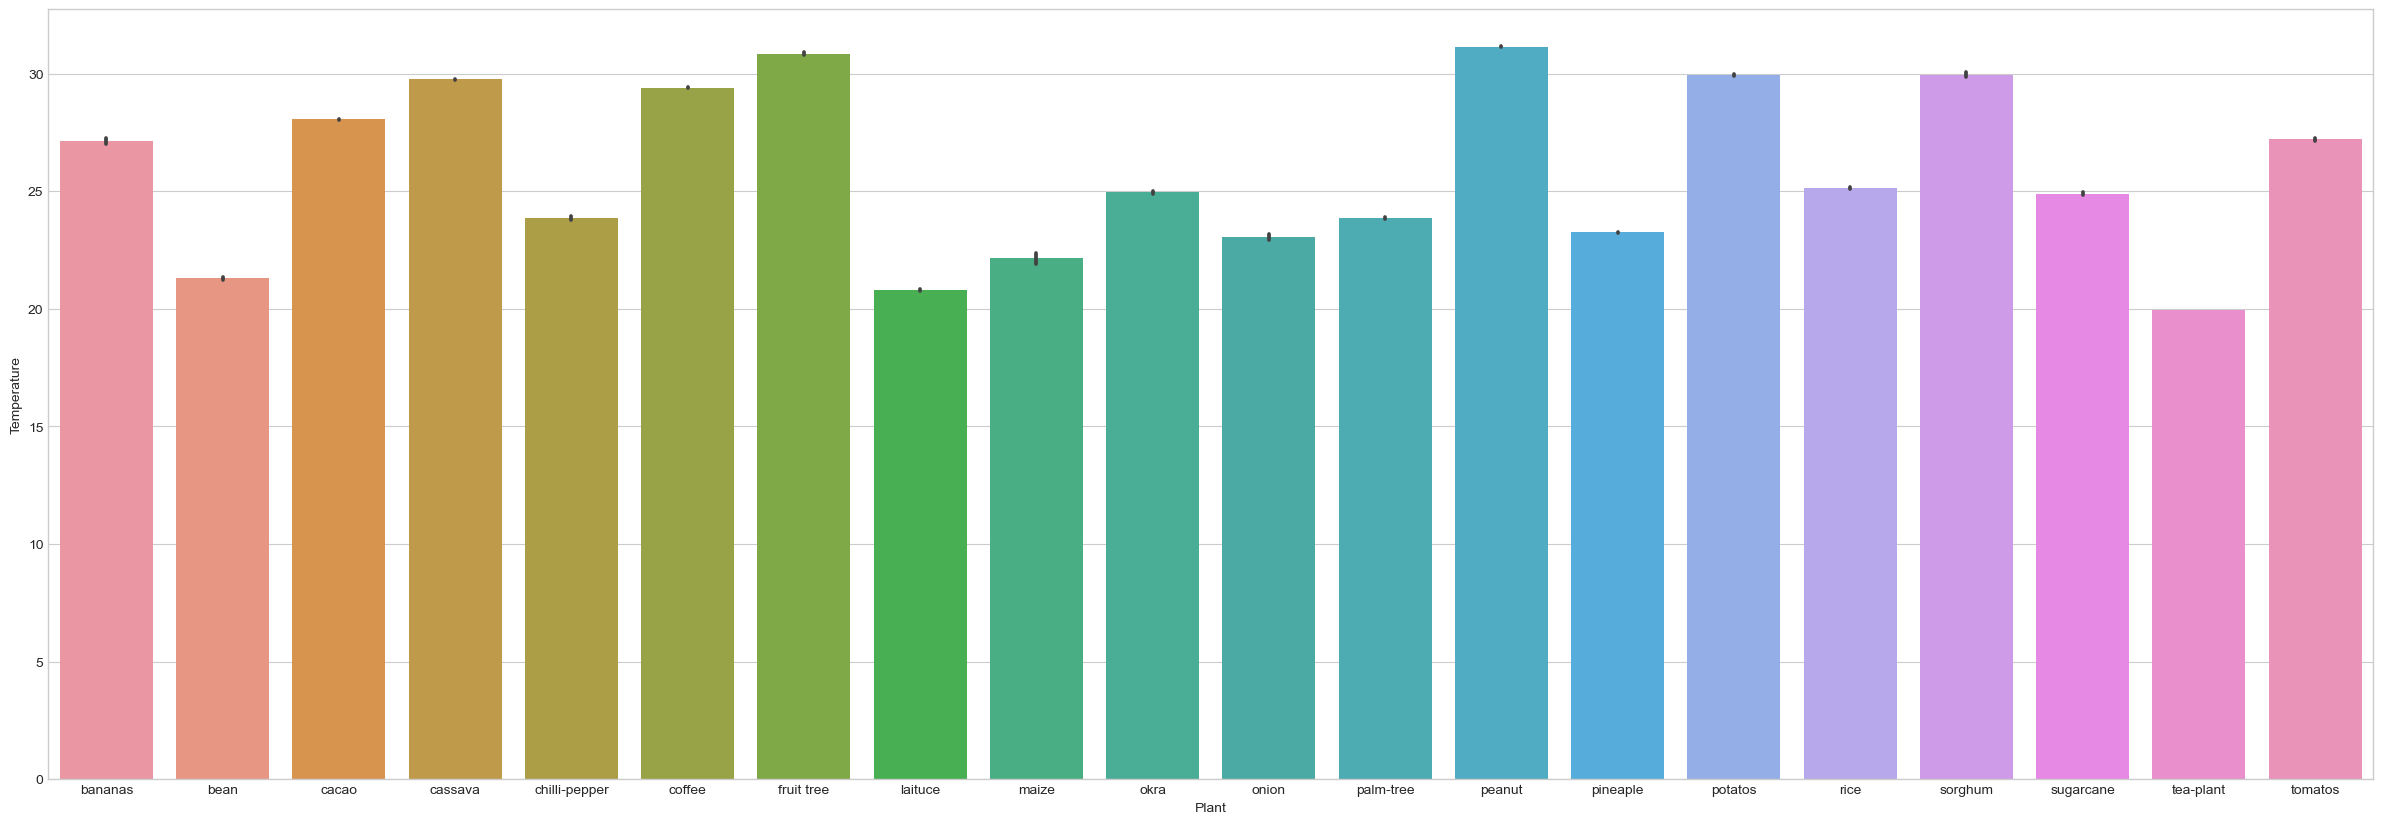

In [98]:
plt.figure(figsize =(30,10))
sns.barplot(x = 'Plant', y='Temperature', data=Datamerge)
plt.show()

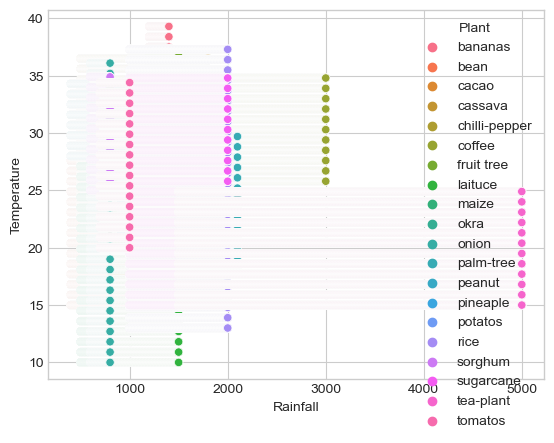

<Figure size 3000x1000 with 0 Axes>

In [99]:
sns.scatterplot(x = 'Rainfall', y='Temperature', data=Datamerge, hue ='Plant' )
plt.figure(figsize =(30,10))
plt.show()

In [104]:
#sns.distplot(Datamerge['Plant'], color ='green')
#plt.figure(figsize =(30,10))
#plt.show()

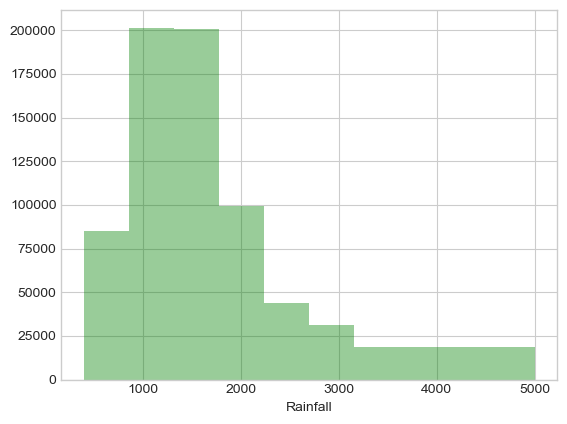

<Figure size 3000x1000 with 0 Axes>

In [105]:
sns.distplot(Datamerge['Rainfall'], color ='green', bins= 10, kde = False)
plt.figure(figsize =(30,10))
plt.show()

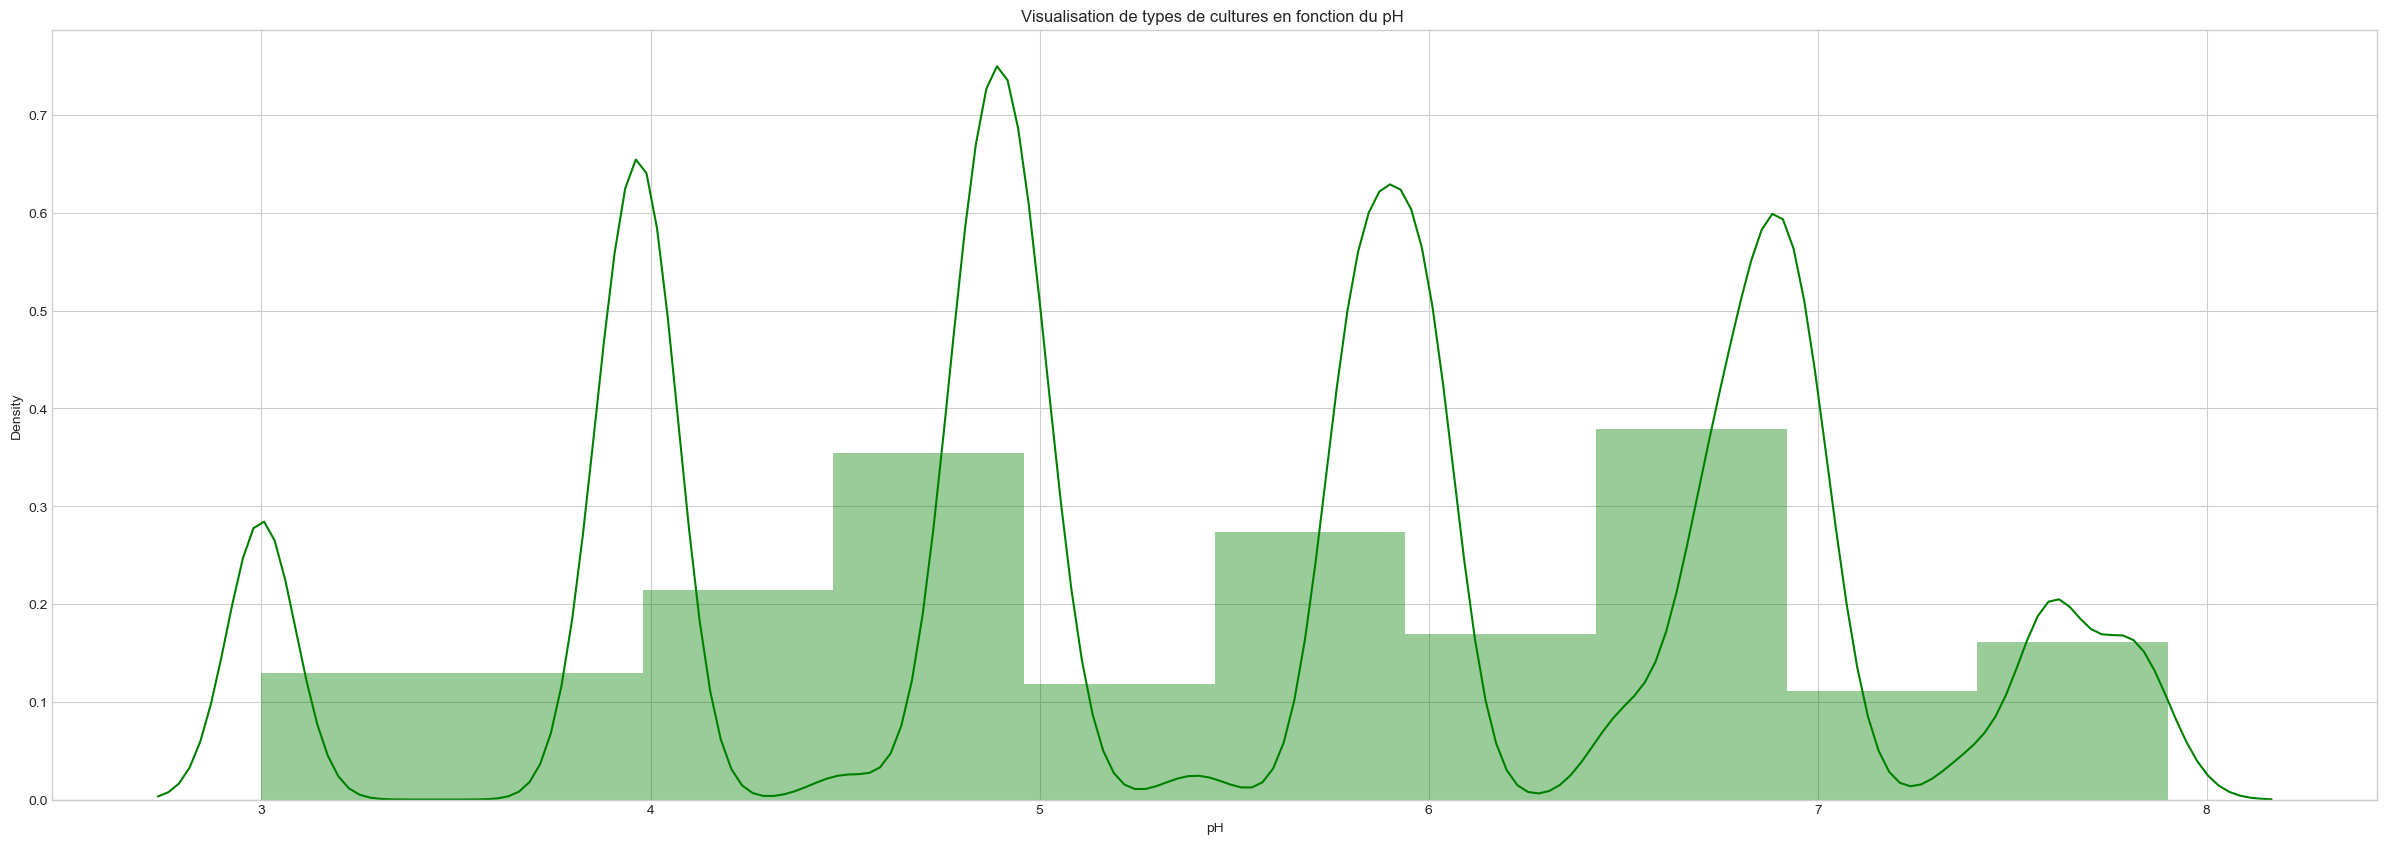

In [106]:
plt.figure(figsize =(30,10))
sns.distplot(Datamerge['pH'], color ='green', bins= 10, vertical = False)
plt.title("Visualisation de types de cultures en fonction du pH ")
plt.show()

## Variable quantitative

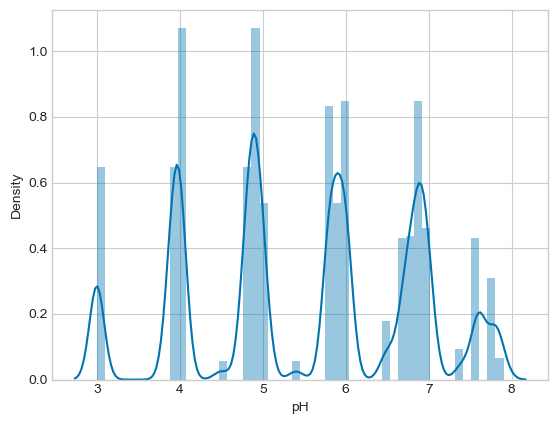

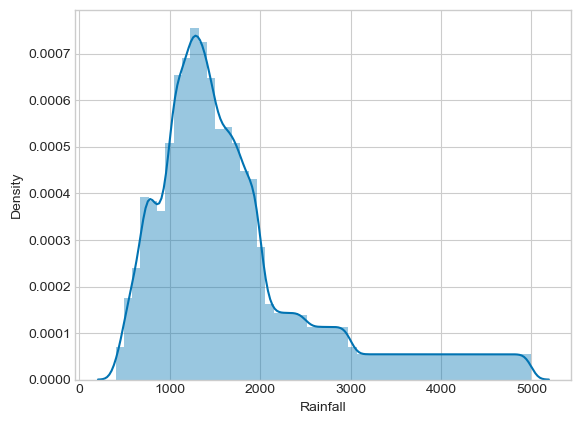

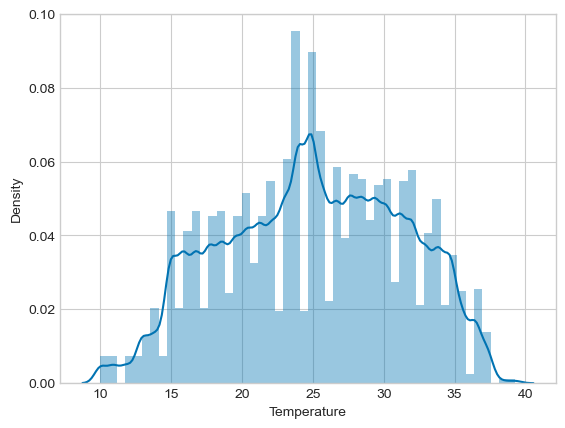

In [107]:
for col in Datamerge.select_dtypes('float'):
    plt.figure()
    sns.distplot(Datamerge[col])

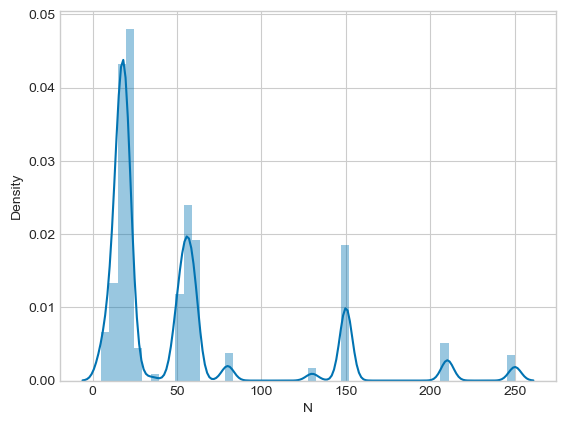

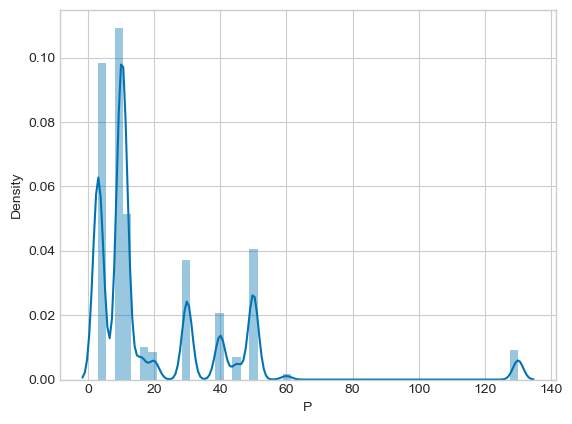

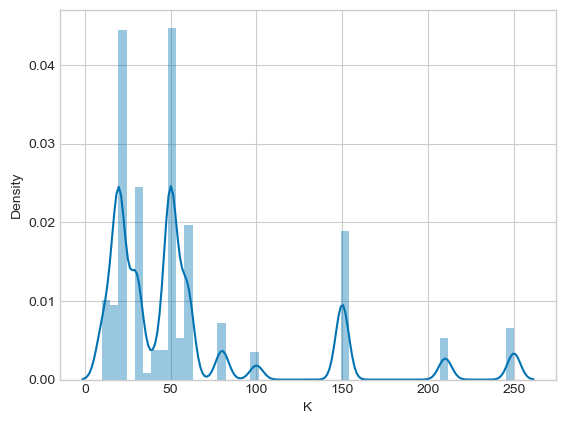

In [108]:
for col in Datamerge.select_dtypes('int'):
    plt.figure()
    sns.distplot(Datamerge[col])

### Variables qualitatives

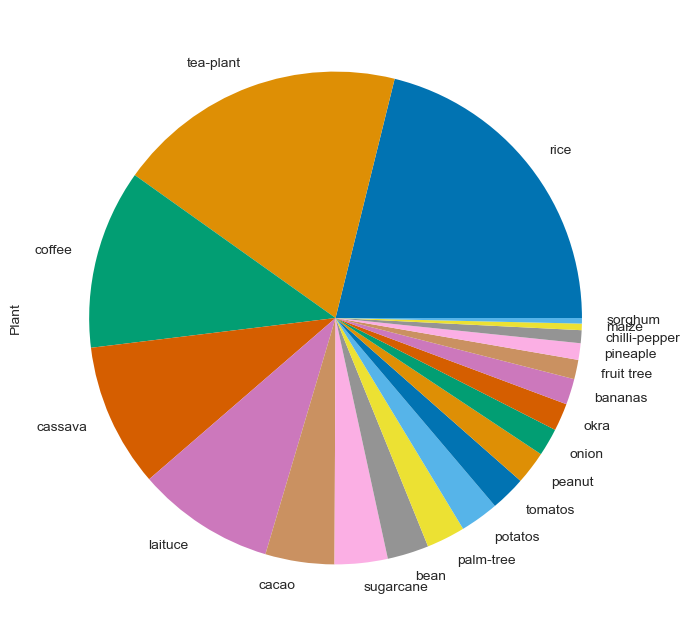

In [109]:
for col in Datamerge.select_dtypes('object'):
    plt.figure(figsize =(20,8))
    Datamerge[col].value_counts().plot.pie()

Text(0.5, 1.0, 'Visualisation de types de cultures')

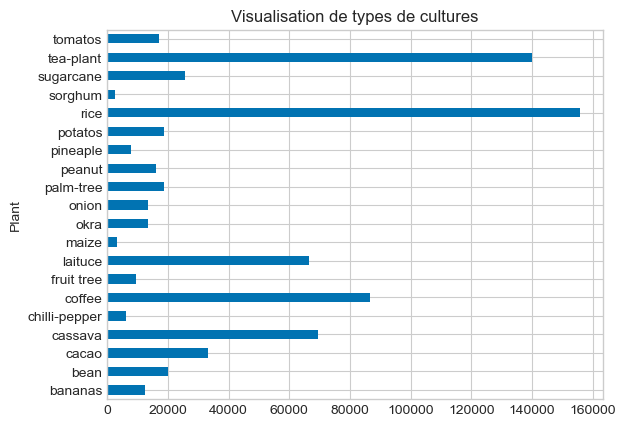

In [110]:
by_plant = Datamerge.groupby('Plant')
by_plant.size().plot(kind='barh')
plt.title("Visualisation de types de cultures")

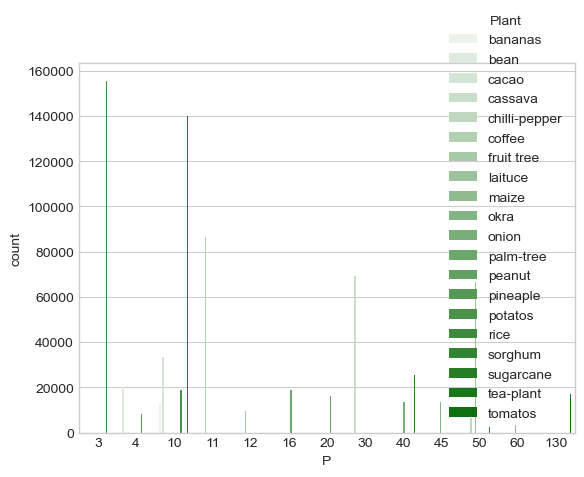

<Figure size 4000x2000 with 0 Axes>

In [111]:
sns.countplot(data = Datamerge, x='P', hue = 'Plant', color ='green')
plt.figure(figsize =(40,20))
plt.show()

In [112]:
pd.crosstab(Datamerge['Plant'], Datamerge['pH'])

pH,3.0,3.9,4.0,4.5,4.8,4.9,5.0,5.4,5.8,5.9,6.0,6.5,6.7,6.8,6.9,7.0,7.4,7.6,7.8,7.9
Plant,,,,,,,,,,,,,,,,,,,,
bananas,0,0,0,0,0,0,0,0,0,0,6244,0,0,0,6244,0,0,0,0,0
bean,0,0,0,0,0,0,10005,0,0,10005,0,0,0,0,0,0,0,0,0,0
cacao,0,0,0,0,0,0,0,0,0,0,16670,0,0,0,16670,0,0,0,0,0
cassava,0,0,0,0,0,0,23120,0,0,23120,0,0,0,23120,0,0,0,0,0,0
chilli-pepper,0,0,0,0,0,0,0,0,0,0,0,6230,0,0,0,0,0,0,0,0
coffee,0,0,28899,0,0,28899,0,0,28899,0,0,0,0,0,0,0,0,0,0,0
fruit tree,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4676,0,0,0,4676
laituce,0,0,0,0,0,0,0,0,0,0,22225,0,0,0,22225,0,0,0,22225,0
maize,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3136,0,0,0,0


Les statistiques présentées dans le tableau illustrent la répartition de la croissance des différentes cultures en fonction des niveaux de pH du sol. Chaque colonne représente une plage de valeurs de pH, tandis que chaque ligne représente une culture spécifique.

Voici une interprétation impersonnelle de ces statistiques :

- Pour les cultures de bananes, de haricots, de cacao, de manioc, de piments, de café, de laitue, de maïs, d'okra, d'oignons, de palmiers, d'arachides, d'ananas, de pommes de terre, de riz, de sorgho, de canne à sucre et de thé, la croissance est nulle dans les plages de pH allant de 3,0 à 4,8, de 5,0 à 5,8, de 6,0 à 6,5, de 6,7 à 6,9, et de 7,0 à 7,9. Cependant, des niveaux de croissance significatifs sont observés à pH 4,9, 7,4 et 7,6 pour certaines de ces cultures.

- Les cultures de fruits arbustifs présentent des niveaux de croissance nuls dans toutes les plages de pH, à l'exception de pH 7,0 où une croissance modérée est observée.

- La laitue affiche une croissance significative à pH 5,9, 6,7, 7,0 et 7,9.

- Le sorgho montre une croissance exclusive à pH 6,8.

- La canne à sucre présente une croissance notable à pH 7,6.

- Le thé présente une croissance importante à pH 3,0, 3,9, 4,5, 4,8 et 6,0.

Ces données mettent en évidence la sensibilité différentielle des cultures aux niveaux de pH du sol, ce qui peut être d'une grande importance pour la gestion agricole et le choix des cultures à cultiver dans des conditions spécifiques de pH.

In [113]:
pd.crosstab(Datamerge['Plant'], Datamerge['K'])

K,10,15,20,24,30,35,40,45,50,56,60,80,100,150,210,250
Plant,,,,,,,,,,,,,,,,
bananas,0,0,0,0,0,0,0,0,0,0,0,0,12488,0,0,0
bean,20010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cacao,0,33340,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cassava,0,0,0,0,0,0,0,0,0,0,69360,0,0,0,0,0
chilli-pepper,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6230
coffee,0,0,0,0,86697,0,0,0,0,0,0,0,0,0,0,0
fruit tree,0,0,0,9352,0,0,0,0,0,0,0,0,0,0,0,0
laituce,0,0,0,0,0,0,0,0,0,0,0,0,0,66675,0,0
maize,0,0,0,0,0,3136,0,0,0,0,0,0,0,0,0,0


Les statistiques présentées dans le tableau reflètent la croissance des différentes cultures en fonction des niveaux de potassium (représentés par la variable "K"). Chaque colonne correspond à une plage de valeurs de K, tandis que chaque ligne représente une culture spécifique.

Voici une interprétation impersonnelle des statistiques :

- Les cultures de bananes ne montrent de croissance significative qu'à un niveau de potassium de 60, avec un nombre de 12 488 unités.

- Les haricots présentent une croissance exclusive au niveau de potassium de 10, avec un nombre de 20 010 unités.

- Le cacao affiche une croissance notable au niveau de potassium de 15, avec un nombre de 33 340 unités.

- La croissance de la culture du manioc est observée uniquement au niveau de potassium de 56, avec un nombre de 69 360 unités.

- Les piments présentent une croissance notable au niveau de potassium de 210, avec un nombre de 6 230 unités.

- Le café montre une croissance exclusive au niveau de potassium de 24, avec un nombre de 86 697 unités.

- La croissance des arbres fruitiers est observée uniquement au niveau de potassium de 15, avec un nombre de 9 352 unités.

- La laitue affiche une croissance significative au niveau de potassium de 150, avec un nombre de 66 675 unités.

- Le maïs présente une croissance exclusive au niveau de potassium de 35, avec un nombre de 3 136 unités.

- L'okra montre une croissance notable au niveau de potassium de 45, avec un nombre de 13 344 unités.

- Les oignons présentent une croissance notable au niveau de potassium de 45, avec un nombre de 13 380 unités.

- Les palmiers affichent une croissance exclusive au niveau de potassium de 50, avec un nombre de 18 676 unités.

- Les arachides montrent une croissance significative au niveau de potassium de 10, avec un nombre de 16 000 unités.

- Les ananas présentent une croissance exclusive au niveau de potassium de 20, avec un nombre de 8 004 unités.

- Les pommes de terre montrent une croissance exclusive au niveau de potassium de 150, avec un nombre de 18 672 unités.

- Le riz affiche une croissance significative au niveau de potassium de 45, avec un nombre de 155 680 unités.

- Le sorgho montre une croissance exclusive au niveau de potassium de 50, avec un nombre de 2 676 unités.

- La canne à sucre présente une croissance significative au niveau de potassium de 250, avec un nombre de 25 576 unités.

- Les plantations de thé montrent une croissance exclusive au niveau de potassium de 20, avec un nombre de 140 004 unités.

- Les tomates présentent une croissance significative au niveau de potassium de 250, avec un nombre de 17 034 unités.

Ces données mettent en lumière la dépendance de la croissance des cultures à différents niveaux de potassium, ce qui peut avoir des implications importantes pour la gestion des cultures et l'optimisation de la fertilisation en potassium.

In [114]:
Datamerge.groupby('Plant')['pH'].agg(['min', 'max', 'mean'])

,min,max,mean
Plant,,,
bananas,6.0,6.9,6.45
bean,5.0,5.9,5.45
cacao,6.0,6.9,6.45
cassava,5.0,6.8,5.90
chilli-pepper,6.5,6.5,6.50
coffee,4.0,5.8,4.90
fruit tree,7.0,7.9,7.45
laituce,6.0,7.8,6.90
maize,7.0,7.0,7.00


Ces statistiques indiquent les valeurs minimales, maximales et moyennes des niveaux de pH pour différentes cultures. Le pH est une mesure de l'acidité ou de la basicité du sol, et il peut avoir un impact significatif sur la croissance et la santé des cultures.

- Pour les bananes, le pH varie de 6,0 (valeur minimale) à 6,9 (valeur maximale), avec une moyenne de 6,45. Cela indique que les bananes sont cultivées dans des sols légèrement acides à légèrement basiques.

- Les haricots ont un pH compris entre 5,0 (valeur minimale) et 5,9 (valeur maximale), avec une moyenne de 5,45. Les sols pour les haricots sont légèrement acides.

- Le cacao présente des niveaux de pH similaires à ceux des bananes, allant de 6,0 à 6,9, avec une moyenne de 6,45. Les sols du cacao sont également légèrement acides à légèrement basiques.

- Le manioc a un pH qui varie de 5,0 à 6,8, avec une moyenne de 5,90. Les sols du manioc peuvent être légèrement acides à légèrement basiques.

- Les piments ont un pH constant de 6,5, indiquant que les sols pour les piments sont neutres.

- Le café présente des variations de pH de 4,0 à 5,8, avec une moyenne de 4,90. Les sols du café sont légèrement acides.

- Les arbres fruitiers ont un pH compris entre 7,0 et 7,9, avec une moyenne de 7,45. Les sols des arbres fruitiers sont légèrement basiques.

- La laitue montre des variations de pH de 6,0 à 7,8, avec une moyenne de 6,90. Les sols de la laitue peuvent varier de légèrement acides à légèrement basiques.

- Le maïs a un pH constant de 7,0, indiquant que les sols pour le maïs sont neutres.

- L'okra a des niveaux de pH similaires à ceux des bananes et du cacao, allant de 6,0 à 6,9, avec une moyenne de 6,45. Les sols de l'okra sont légèrement acides à légèrement basiques.

- Les oignons ont un pH qui varie de 6,5 à 7,4, avec une moyenne de 6,95. Les sols des oignons sont légèrement acides à légèrement basiques.

- Les palmiers présentent des variations de pH de 4,0 à 4,9, avec une moyenne de 4,45. Les sols des palmiers sont légèrement acides.

- Les arachides ont des niveaux de pH similaires à ceux des palmiers, allant de 4,0 à 4,9, avec une moyenne de 4,45. Les sols des arachides sont légèrement acides.

- Les ananas ont un pH compris entre 4,5 et 5,4, avec une moyenne de 4,95. Les sols des ananas sont légèrement acides.

- Les pommes de terre ont des niveaux de pH similaires à ceux des bananes, du cacao et de l'okra, allant de 6,0 à 6,9, avec une moyenne de 6,45. Les sols des pommes de terre sont légèrement acides à légèrement basiques.

- Le riz montre des variations de pH de 4,0 à 7,6, avec une moyenne de 5,80. Les sols du riz peuvent varier de légèrement acides à légèrement basiques.

- Le sorgho a un pH constant de 6,8, indiquant que les sols pour le sorgho sont légèrement acides.

- La canne à sucre présente un pH constant de 7,0, indiquant que les sols pour la canne à sucre sont neutres.

- Les plantations de thé ont des niveaux de pH allant de 3,0 à 4,8, avec une moyenne de 3,90. Les sols des plantations de thé sont acides.

- Les tomates ont des variations de pH de 5,0 à 6,8, avec une moyenne de 5,90. Les sols des tomates peuvent varier de légèrement acides à légèrement basiques.

Ces données mettent en évidence la diversité des niveaux de pH des sols pour différentes cultures, ce qui peut avoir des implications importantes pour le choix des cultures à cultiver et la gestion de la qualité du sol.

## Matrice des corrélations

In [115]:
corrmat = Datamerge.corr()
corrmat

,N,P,K,pH,Rainfall,Temperature
N,1.000000,0.352761,0.709600,0.385337,-0.276901,0.043884
P,0.352761,1.000000,0.710601,0.316553,-0.332156,0.003171
K,0.709600,0.710601,1.000000,0.421993,-0.381594,0.021264
pH,0.385337,0.316553,0.421993,1.000000,-0.529464,0.141221
Rainfall,-0.276901,-0.332156,-0.381594,-0.529464,1.000000,-0.238707
Temperature,0.043884,0.003171,0.021264,0.141221,-0.238707,1.000000


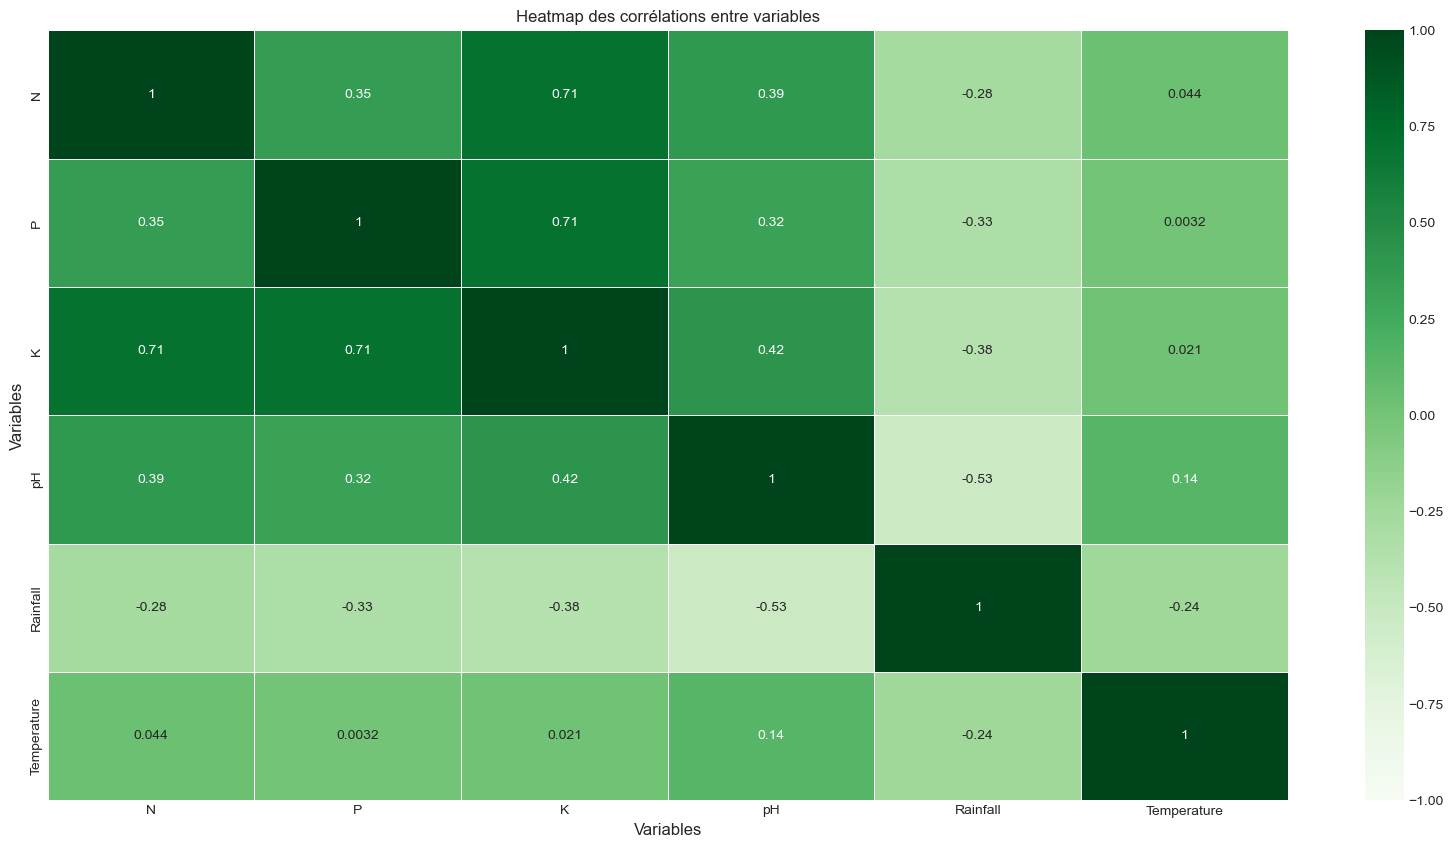

In [116]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,xticklabels=corrmat.columns,yticklabels = corrmat.columns,
            vmin = -1, vmax = +1, center = 0,
            cmap = 'Greens',linewidths=0.5, annot=True)
plt.title('Heatmap des corrélations entre variables',fontsize=12)
plt.xlabel('Variables',fontsize=12)
plt.ylabel('Variables',fontsize=12)
plt.show()

Cette matrice de corrélation  indique les corrélations entre plusieurs variables liées à la croissance des cultures, à savoir l'azote (N), le phosphore (P), le potassium (K), le pH du sol, les précipitations (Rainfall) et la température (Temperature). Les valeurs de la corrélation varient de -1 à 1, où -1 indique une corrélation négative parfaite, 1 indique une corrélation positive parfaite et 0 indique aucune corrélation.

1. Corrélation entre l'azote (N) et les autres variables :
   - Corrélation avec le phosphore (P) : 0.352761, indiquant une corrélation positive modérée.
   - Corrélation avec le potassium (K) : 0.709600, indiquant une forte corrélation positive.
   - Corrélation avec le pH : 0.385337, indiquant une corrélation positive modérée.
   - Corrélation avec les précipitations (Rainfall) : -0.276901, indiquant une corrélation négative modérée.
   - Corrélation avec la température (Temperature) : 0.043884, indiquant une corrélation positive faible.

2. Corrélation entre le phosphore (P) et les autres variables :
   - Corrélation avec le potassium (K) : 0.710601, indiquant une forte corrélation positive.
   - Corrélation avec le pH : 0.316553, indiquant une corrélation positive modérée.
   - Corrélation avec les précipitations (Rainfall) : -0.332156, indiquant une corrélation négative modérée.
   - Corrélation avec la température (Temperature) : 0.003171, indiquant une corrélation positive très faible.

3. Corrélation entre le potassium (K) et les autres variables :
   - Corrélation avec le pH : 0.421993, indiquant une corrélation positive modérée.
   - Corrélation avec les précipitations (Rainfall) : -0.381594, indiquant une corrélation négative modérée.
   - Corrélation avec la température (Temperature) : 0.021264, indiquant une corrélation positive faible.

4. Corrélation entre le pH et les autres variables :
   - Corrélation avec les précipitations (Rainfall) : -0.529464, indiquant une corrélation négative modérée.
   - Corrélation avec la température (Temperature) : 0.141221, indiquant une corrélation positive modérée.

5. Corrélation entre les précipitations (Rainfall) et la température (Temperature) : -0.238707, indiquant une corrélation négative modérée entre la quantité de précipitations et la température.

Ces corrélations fournissent des informations sur les relations potentielles entre ces variables dans le contexte de la croissance des cultures. Par exemple, une forte corrélation positive entre l'azote et le potassium pourrait indiquer que l'ajout d'azote au sol est associé à une augmentation du niveau de potassium. De même, une corrélation négative entre le pH du sol et les précipitations suggère que des niveaux de pH plus élevés sont associés à des précipitations plus faibles. Ces informations peuvent être utiles pour la gestion agricole et la planification des cultures.

## Encodage de la variable Plant

In [117]:
# Création d'un dictionnaire de mappage des plantes aux numéros
plante_mapping = {'bananas': 1,'bean':2, 'cacao': 3,'cassava': 4,'chilli-pepper': 5,'coffee': 6,'fruit tree': 7,'laituce': 8,'maize': 9,
    'okra': 10,'onion': 11,'palm-tree': 12,'peanut': 13,'pineaple': 14,'potatos': 15,'rice': 16,'sorghum': 17,
                  'sugarcane': 18,'tea-plant': 19,'tomatos': 20}
# Appliquation de la fonction lambda pour encoder les plantes
Datamerge['Plante_Num'] = Datamerge['Plant'].apply(lambda x: plante_mapping.get(x, 0))
# Notation: 0 est utilisé comme valeur par défaut si la plante n'est pas trouvée dans le dictionnaire de mappage

In [118]:
Datamerge

,Plant,N,P,K,pH,Rainfall,Temperature,Plante_Num
0,bananas,250,10,100,6.0,1200.0,15.0,1
1,bananas,250,10,100,6.0,1200.0,15.9,1
2,bananas,250,10,100,6.0,1200.0,16.8,1
3,bananas,250,10,100,6.0,1200.0,17.7,1
4,bananas,250,10,100,6.0,1200.0,18.6,1
...,...,...,...,...,...,...,...,...
736329,tomatos,50,130,250,6.8,999.7,30.8,20
736330,tomatos,50,130,250,6.8,999.7,31.7,20
736331,tomatos,50,130,250,6.8,999.7,32.6,20
736332,tomatos,50,130,250,6.8,999.7,33.5,20


In [119]:
## Suppréssion de la colonne 'Plant'
df = Datamerge.drop('Plant', axis = 1)
print("\n DataFrame après suppression de la colonne 'Plant' :")
print(df)


 DataFrame après suppression de la colonne 'Plant' :
          N    P    K   pH  Rainfall  Temperature  Plante_Num
0       250   10  100  6.0    1200.0         15.0           1
1       250   10  100  6.0    1200.0         15.9           1
2       250   10  100  6.0    1200.0         16.8           1
3       250   10  100  6.0    1200.0         17.7           1
4       250   10  100  6.0    1200.0         18.6           1
...     ...  ...  ...  ...       ...          ...         ...
736329   50  130  250  6.8     999.7         30.8          20
736330   50  130  250  6.8     999.7         31.7          20
736331   50  130  250  6.8     999.7         32.6          20
736332   50  130  250  6.8     999.7         33.5          20
736333   50  130  250  6.8     999.7         34.4          20

[736334 rows x 7 columns]


In [120]:
df.head()

,N,P,K,pH,Rainfall,Temperature,Plante_Num
0,250,10,100,6.0,1200.0,15.0,1
1,250,10,100,6.0,1200.0,15.9,1
2,250,10,100,6.0,1200.0,16.8,1
3,250,10,100,6.0,1200.0,17.7,1
4,250,10,100,6.0,1200.0,18.6,1


## Normalisation des données

In [121]:
# Application de StandardScaler aux colonnes numériques (à l'exception de "Plante_Num")
scaler = StandardScaler()
numerical_columns = ['N', 'P', 'K', 'pH', 'Rainfall', 'Temperature']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Affichage du DataFrame final avec les données normalisées
print("DataFrame final avec les données normalisées :")
print(df)

DataFrame final avec les données normalisées :
               N         P         K        pH  Rainfall  Temperature  \
0       3.675500 -0.434408  0.712526  0.356365 -0.568739    -1.593222   
1       3.675500 -0.434408  0.712526  0.356365 -0.568739    -1.450164   
2       3.675500 -0.434408  0.712526  0.356365 -0.568739    -1.307106   
3       3.675500 -0.434408  0.712526  0.356365 -0.568739    -1.164048   
4       3.675500 -0.434408  0.712526  0.356365 -0.568739    -1.020989   
...          ...       ...       ...       ...       ...          ...   
736329 -0.007926  4.776146  3.372722  0.961275 -0.776766     0.918244   
736330 -0.007926  4.776146  3.372722  0.961275 -0.776766     1.061303   
736331 -0.007926  4.776146  3.372722  0.961275 -0.776766     1.204361   
736332 -0.007926  4.776146  3.372722  0.961275 -0.776766     1.347419   
736333 -0.007926  4.776146  3.372722  0.961275 -0.776766     1.490477   

        Plante_Num  
0                1  
1                1  
2            

###  Création de données de test et d'entrainement

In [122]:
df.head()

,N,P,K,pH,Rainfall,Temperature,Plante_Num
0,3.6755,-0.434408,0.712526,0.356365,-0.568739,-1.593222,1
1,3.6755,-0.434408,0.712526,0.356365,-0.568739,-1.450164,1
2,3.6755,-0.434408,0.712526,0.356365,-0.568739,-1.307106,1
3,3.6755,-0.434408,0.712526,0.356365,-0.568739,-1.164048,1
4,3.6755,-0.434408,0.712526,0.356365,-0.568739,-1.020989,1


In [123]:
X = df[['N', 'P', 'K', 'pH', 'Rainfall', 'Temperature']]
Y = df['Plante_Num']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [125]:
print('Train size:', X_train.shape[0])
print('Test size:', X_test.shape[0])

Train size: 515433
Test size: 220901


In [126]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

## test de prédiction
y_pred = reg_log.predict(X_test)
y_prob = reg_log.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
acc_reg_test = accuracy_score(y_test, y_pred)
print("Matrice de confusion:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Matrice de confusion:
[[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0     0     0     0    

## Regression logistique multinomiale

In [127]:
# Créer et ajuster le modèle de régression logistique multinomiale
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

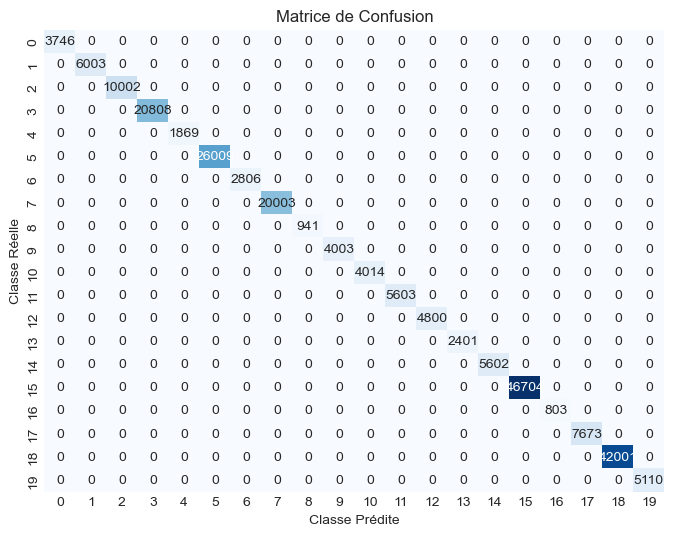

In [128]:
# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')
plt.show()

In [71]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classificat_report = classification_report(y_test, y_pred)

print(f'Précision : {accuracy}')
print('Matrice de confusion :')
print(confusion)
print('Rapport de classification :')
print(classificat_report)

Précision : 1.0
Matrice de confusion :
[[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0     

### Construction de la forêt aléatoire

In [72]:
# Créez un modèle de forêt aléatoire avec un certain nombre d'arbres (par exemple, 100 arbres)
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustez le modèle aux données d'entraînement
model3.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = model3.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)  # Utilisez un nom de variable différent, par exemple 'class_report'

print(f'Précision : {accuracy}')
print('Matrice de confusion :')
print(confusion)
print('Rapport de classification :')
print(class_report)  # Utilisez le nouveau nom de variable 'class_report'

Précision : 1.0
Matrice de confusion :
[[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0     

### Création du modèle Gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Création du modèle Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

#  Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f'Précision : {accuracy}')
print('Matrice de Confusion :\n', confusion)
print('Rapport de Classification :\n', report)

Précision : 1.0
Matrice de Confusion :
 [[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0    

### Création de la méthode Naive Bayesian

In [74]:
from sklearn.naive_bayes import GaussianNB

# Création et entraînenement le modèle Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = naive_bayes_model.predict(X_test)

# Évaluation les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f'Précision : {accuracy}')
print('Matrice de confusion :')
print(confusion)
print('Rapport de classification :')
print(report)

Précision : 1.0
Matrice de confusion :
[[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0     

### Création de la méthode K-Nearest Neighbors (KNN)

In [75]:
# Chargez votre base de données (assurez-vous que Datamerge contient toutes les variables nécessaires)
# Par exemple, supposons que vous avez déjà chargé vos données dans un DataFrame Datamerge

# Normalisez les données (il est important de normaliser pour KNN)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Créez un classificateur KNN (spécifiez le nombre de voisins, par exemple k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Entraînez le modèle sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichez les résultats
print(f'Précision : {accuracy}')
print('Matrice de confusion :\n', confusion)
print('Rapport de classification :\n', report)

Précision : 1.0
Matrice de confusion :
 [[ 3746     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  6003     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0 10002     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0 20808     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  1869     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0 26009     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0  2806     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 20003     0     0     0     0
      0    

### Création de réseaux de neurone

In [76]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Charger votre base de données, assurez-vous qu'elle est prétraitée et normalisée

# Supposons que X représente vos caractéristiques (N, K, P, pH, Rainfall, Temperature)
# et que y représente votre variable cible (Plant)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraiter les étiquettes en les encodant (si elles ne le sont pas déjà)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle de réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Couche d'entrée
    tf.keras.layers.Dense(64, activation='relu'),  # Couche cachée avec activation ReLU
    tf.keras.layers.Dense(32, activation='relu'),  # Autre couche cachée
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Couche de sortie avec activation softmax
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer les performances sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Précision sur l\'ensemble de test : {test_accuracy}')

# Faire des prédictions sur de nouvelles données
# new_data = ...  # Préparez vos nouvelles données de la même manière que les données d'entraînement
# predictions = model.predict(new_data)


NameError: name 'y' is not defined

### Création du modèle Support Vector Machine(SVM)

In [ ]:
# Importez les bibliothèques nécessaires
from sklearn.svm import SVC
# Créez un modèle SVM (par exemple, un SVM linéaire)
svm_model = SVC(kernel='linear', random_state=42)

# Entraînez le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Précision : {accuracy}')
print(f'Matrice de confusion :\n{confusion}')
print(f'Rapport de classification :\n{report}')

### Création du pipeline 

In [ ]:
# Importez les biliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Chargez votre base de données (assurez-vous que votre CSV est dans le même répertoire)
#data = pd.read_csv('votre_fichier.csv')

# Divisez vos données en variables indépendantes (X) et la variable dépendante (y)
#X = df[['N', 'K', 'P', 'pH', 'Rainfall', 'Temperature']]
#y = df['Plante_Num']

# Divisez les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez les différents modèles que vous souhaitez utiliser
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
gb_model = GradientBoostingClassifier(random_state=42)
nb_model = GaussianNB()

# Créez la pipeline pour la Régression Logistique (vous pouvez ajuster les étapes pour d'autres modèles)
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('logistic', lr_model)  # Régression Logistique
])

# Créez le VotingClassifier avec les différents modèles
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('random_forest', rf_model),
    ('logistic', logistic_pipeline),  # Utilisation de la pipeline pour la Régression Logistique
    ('knn', knn_model),
    ('gradient_boosting', gb_model),
    ('naive_bayes', nb_model)
], voting='hard')  # Utilisez 'hard' pour un vote majoritaire

# Entraînez le VotingClassifier sur l'ensemble d'entraînement
voting_classifier.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = voting_classifier.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichez les résultats
print(f'Précision : {accuracy}')
print(f'Matrice de confusion :\n{confusion}')
print(f'Rapport de classification :\n{report}')

### Création du pipeline

In [ ]:
from sklearn.pipeline import Pipeline
# Créez un pipeline avec des étapes : normalisation et modèle de forêt aléatoire
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de normalisation
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

# Ajustez le modèle aux données d'entraînement à l'aide du pipeline
pipeline.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test à l'aide du pipeline
y_pred = pipeline.predict(X_test)

# Évaluez les performances du modèle à l'aide du pipeline
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Précision : {accuracy}')
print('Matrice de confusion :')
print(confusion)
print('Rapport de classification :')
print(class_report)

In [ ]:
# Création d'un DataFrame à partir des résultats de l'analyse de variance
results = {
    'Variable': ['C(N)', 'C(pH)', 'C(Temperature)', 'C(K)', 'C(P)', 'Residual'],
    'sum_sq': [0.254562, 0.058231, 2.181152, 0.279479, 0.217961, 227029.272914],
    'df': [15.0, 19.0, 152.0, 15.0, 12.0, 736141.0],
    'F': [0.055028, 0.009938, 0.046529, 0.060414, 0.058895, None],  # Remplacez de None par la valeur F appropriée pour Residual
    'PR(>F)': [1.000000, 0.999999, 0.999998, 1.000000, 0.999998, None]  # Remplacement de None par la valeur PR(>F) appropriée pour Residual
}
df_results = pd.DataFrame(results)
# Création d'un graphique en barres pour les valeurs F
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='F', data=df_results, palette='viridis')
plt.title('Analyse de variance - Valeurs F')
plt.xlabel('Variable')
plt.ylabel('Valeur F')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Les résultats de l'analyse de variance (ANOVA) montrent l'impact des différentes variables (N, pH, Température, K, P) sur la variable dépendante "Rainfall". 

- C(N) : La variation attribuable à la variable "N" est de l'ordre de 2.36e+05. Cependant, le test F associé avec une valeur de 0.055029 est très faible, ce qui indique que la variable "N" n'a pas un effet significatif sur les variations de "Rainfall." La p-value (PR(>F)) de 1.000000 confirme que cette variable n'est pas statistiquement significative.

- C(pH) : La variation attribuable à la variable "pH" est de l'ordre de 5.39e+04. Le test F avec une valeur de 0.009929 est également très faible, indiquant que la variable "pH" n'a pas d'effet significatif sur "Rainfall." La p-value de 0.999999 confirme l'absence de signification statistique.

- C(Temperature) : La variation attribuable à la variable "Température" est beaucoup plus élevée, soit environ 2.02e+06. Cependant, le test F avec une valeur de 0.046592 est faible, indiquant que "Température" a un effet relativement faible sur "Rainfall." La p-value de 0.999998 suggère que cet effet n'est pas statistiquement significatif.

- C(K) : La variation attribuable à la variable "K" est d'environ 2.59e+05. Toutefois, le test F avec une valeur de 0.060415 est faible, ce qui signifie que la variable "K" n'a pas un effet significatif sur "Rainfall." La p-value de 1.000000 le confirme.

- C(P) : La variation attribuable à la variable "P" est d'environ 2.02e+05. Le test F avec une valeur de 0.058896 est faible, indiquant que la variable "P" n'a pas un effet significatif sur "Rainfall." La p-value de 0.999998 confirme l'absence de signification statistique.

- Residual : La variation résiduelle, qui représente la part non expliquée par les variables étudiées, est très élevée, soit environ 2.10e+11. Le modèle dans son ensemble ne semble pas bien expliquer les variations de "Rainfall," comme en témoigne l'absence de significativité statistique (NaN) pour le test F et la p-value.

In [ ]:
##  Analyse de la Variance
import statsmodels as sm
import statsmodels.api as sm

# Définissez le modèle de régression avec la fonction ols
model_2 = sm.OLS.from_formula('K ~ C(N)  + C(P)', data=df).fit()
# Effectuez l'analyse de variance
table_2 = sm.stats.anova_lm(model_2, typ=2)
print(table_2)

In [ ]:
# Création d'un DataFrame à partir des résultats de l'analyse de variance
result = {
    'Variable': ['C(N)', 'C(P)', 'Residual'],
    'sum_sq': [-1.627431e-07, -1.866477e-06, 8.024638e+02],
    'df': [15.0, 12.0, 736306.0],
    'F': [-0.000010, -0.000143, None],  # Remplacez de None par la valeur F appropriée pour Residual
    'PR(>F)': [1.0, 1.0, None]  # Remplacement de None par la valeur PR(>F) appropriée pour Residual
}
df_results = pd.DataFrame(result)
# Création d'un graphique en barres pour les valeurs F
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='F', data=df_results, palette='viridis')
plt.title('Analyse de variance - Valeurs F')
plt.xlabel('Variable')
plt.ylabel('Valeur F')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
res = model_2.resid
fig = sm.qqplot(res, line='s')

## Prédiction des résultats sur l'ensemble test

In [ ]:
y_pred = model.predict(X_test)

## Evaluation des performances du modèle

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Exactitude :", accuracy)
print("Rapport de classification :\n", report)

Le résultat indique que le modèle de régression logistique a atteint une performance exceptionnelle sur l'ensemble de test avec une exactitude (accuracy) de 1.0, ce qui signifie qu'il a prédit correctement la classe de culture pour toutes les observations de l'ensemble de test. En d'autres termes, il n'y a aucune erreur de prédiction, ce qui est un résultat remarquable.

Le rapport de classification fournit des informations plus détaillées sur la performance du modèle pour chaque classe de culture. Voici ce que signifient les métriques clés du rapport de classification :

- **Precision** (précision) : Cela mesure la capacité du modèle à prédire correctement les échantillons positifs (dans ce cas, les cultures) parmi toutes les prédictions positives. Une valeur de 1.00 indique que le modèle n'a fait aucune fausse prédiction positive pour cette classe, ce qui est excellent.

- **Recall** (rappel) : Cela mesure la capacité du modèle à identifier correctement tous les échantillons positifs parmi tous les échantillons réels positifs. Une valeur de 1.00 signifie que le modèle n'a raté aucune des cultures de cette classe.

- **F1-score** : Il s'agit d'une mesure qui combine à la fois la précision et le rappel en une seule métrique. Une valeur de 1.00 indique un équilibre parfait entre la précision et le rappel.

- **Support** : Le nombre d'observations dans chaque classe.

In [ ]:
# Importez la bibliothèque joblib
import joblib

# Chargez le modèle entraîné à partir d'un fichier (remplacez le nom du fichier par le vôtre)
model = joblib.load('model.pkl')
# Préparez de nouvelles données pour l'inférence (remplacez X_new par vos données)
X_new = ...
# Effectuez une inférence en utilisant le modèle
predictions = model.predict(X_new)
# Affichez les prédictions
print(predictions)

In [ ]:
## Création d'une instance de la classe PCA en spécifiant le nombre de composantes principales 
pca = PCA(n_components=4)

In [ ]:
## Ajustement de l'Analyse des Composantes Principales aux données d'entraînement
pca.fit(X_train)

In [ ]:
# Ajustez PCA à vos données
X_pca = pca.fit_transform(X)

# Plot des valeurs propres (variance expliquée)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Composante Principale')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par Composante Principale')
plt.show()

# Plot des composantes principales
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('ACP - Première et Deuxième Composantes Principales')
plt.show()

In [ ]:
# Importez le modèle formé et les bibliothèques nécessaires
from sklearn.externals import joblib
# Chargez le modèle formé à partir d'un fichier
model = joblib.load('modele_entrene.pkl')
# Préparez de nouvelles données pour l'inférence (remplacez X_new par vos données)
X_new = ...
# Effectuez une inférence
predictions = model.predict(X_new)
# Affichez les prédictions
print(predictions)

In [ ]:
## Transformation des données d'entraînement et de test en utilisant la PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

In [ ]:
components = pca.components_
explained_variance = pca.explained_variance_

In [ ]:
# Affichez les résultats
print("Composantes principales :")
print(components)
print("\nVariance expliquée :")
print(explained_variance)
print("\nDonnées transformées :")
print(X_pca)

## Analyse univariée

In [ ]:
# Datamerge : X_train contient les données d'entraînement
plt.figure(figsize =(20,10))
sns.histplot(X_train['Rainfall'], kde=True)
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.title('Histogramme du Rainfall')
plt.show()

## Analyse bivariée

In [ ]:
sns.scatterplot(x='N', y='P', hue='Plante_Num', data=df)
plt.xlabel('Azote(N)')
plt.ylabel('Phosphate(P)')
plt.title('Scatter plot sur Azote et Phosphate')
plt.show()

## Analyse multivariée

In [ ]:
## Visualisation 3D avec 3 variables ('K', 'Rainfall', 'Temperature') 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['K'], X_train['Rainfall'], X_train['Temperature'], color='green')
ax.set_xlabel('K')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Temperature')
plt.title('3D Scatter plot du Potassium, Rainfall et Temperature')
plt.show()

In [ ]:
plt.figure(figsize =(20,10))
total = float(len(df))
ax = sns.countplot(x="Plante_Num", data = df)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format(height/total),
           ha="center")
plt.title("Visualisation du déséquilibre des classes")

In [ ]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

## test de prédiction
y_pred = reg_log.predict(X_test)
y_prob = reg_log.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
acc_reg_test = accuracy_score(y_test, y_pred)
print("Matrice de confusion:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}%'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
y_train = reg_log.predict(X_train)
y_prob = reg_log.predict_proba(X_train)[:,1]

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
acc_reg_train = accuracy_score(y_train, y_train_pred)
print(cm)
print('Matrice de confusion')
print("Classification report:")
print(classification_report(y_train, y_train_pred))

In [ ]:
print("Accuracy: {:.2f}%".format(acc_reg_train * 100))

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
auc = roc_auc_score(y_train, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}%'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
def check_fitting(train_accuracy, test_accuracy, tolerance = 0.05):
    if train_accuracy < test_accuracy - tolerance:
        return"Le modèle Sous-apprend"
    elif train_accuracy > test_accuracy + tolerance:
        return"Le modèle sur-apprend"
    else:
        return "Il n'y a ni sous-apprentissage ni sur-apprentissage"

In [ ]:
check_fitting(acc_reg_train, acc_reg_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)
## Test de prédiction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc_rf_test = accuracy_score(y_test, y_pred)
print("Mtrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_rf_test * 100))
print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
y_train_pred = rf.predict(X_train)
y_prob = rf.predict_proba(X_train)[:,1]

cm = confusion_matrix(y_train, y_train_pred)
acc_rf_train = accuracy_score(y_train, y_train_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_rf_train * 100))
print("Classification report:")
print(classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
auc = roc_auc_score(y_train, y_prob)

plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Forêt aléatoire(Random forest) avec le test validation croisée 

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un classificateur d'arbre de décision avec des paramètres avancés
clf = DecisionTreeClassifier(
    criterion='gini',  # Le critère de séparation (vous pouvez également utiliser 'entropy')
    max_depth=5,  # La profondeur maximale de l'arbre
    min_samples_split=2,  # Le nombre minimum d'échantillons requis pour diviser un nœud
    min_samples_leaf=1,  # Le nombre minimum d'échantillons requis dans une feuille
    random_state=42  # Pour la reproductibilité des résultats
)

# Entraîner le modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = clf.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")


In [ ]:
acc_score = make_score(accuracy_score)

In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Accuracy media della validazione incrociata: {:.2f}%".format(scores.mean() * 100))
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
acc_rf_test = accuracy_score(y_test, y_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_rf * 100))
print("Classification report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = rf.predict(X_train)
y_prob = rf.predict_proba(X_train)[:,1]

cm = confusion_matrix(y_train, y_pred)
acc_rf_train = accuracy_score(y_train, y_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_rf * 100))

print("Classification report:")
print(classification_report(y_train, y_pred))

In [ ]:
check_fitting(acc_rf_train, acc_rf_test)

## 6.Methode de déploiement du model
## Naive de bayes

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Créez un encodeur d'étiquettes
label_encoder = LabelEncoder()
# Appliquez l'encodage des étiquettes à votre variable cible
y_train_over_encoded = label_encoder.fit_transform(y_train_over)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
acc_naive_test = accuracy_score(y_test, y_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_naive_test * 100))

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
## Train prediction
y_train_pred = nb.predict(X_train)
y_prob = nb.predict_proba(X_train)[:,1]

cm = confusion_matrix(y_train, y_train_pred)
acc_naive_train = accuracy_score(y_train, y_train_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_naive_train * 100))

print("Classification report:")
print(classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
auc = roc_auc_score(y_train, y_train_pred)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
check_fitting(acc_naive_train, acc_naive_test)

In [ ]:
models = ['Logistic Regression','Random Forest','Naive Bayes']
accuracies_test = [acc_reg_test, acc_rf_test, acc_naive_test]
accuracies_train = [acc_reg_train, acc_rf_train, acc_naive_train]
x = np.arange(len(models))
width = 0.35

In [ ]:
fig, ax = plt.subplots(1, figsize = (10, 10))
rects1 = ax.bar(x-width/2, accuracies_test, width, label='Test', color = 'g')
rect2 = ax.bar(x + width/2, accuracies_train, width, label='Train', color='r')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models is')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

In [ ]:
X1 = df[['N', 'P', 'K', 'pH', 'Rainfall', 'Temperature']]
Y1 = df['Plante_Num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, stratify=Y1, random_state=0)

In [ ]:
over = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [ ]:
nb_over = GaussianNB()
nb_over.fit(X_train_over, y_train_over)
y_pred = nb_over.predict(X_test)
y_prob = nb_over.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
acc_naive_test_over = accuracy_score(y_test, y_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_naive_test * 100))

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
y_train_pred = nb_over.predict(X_train_over)
y_prob = nb_over.predict_proba(X_train_over)[:,1]

cm = confusion_matrix(y_train_over, y_train_pred)
acc_naive_train_over = accuracy_score(y_train_over, y_train_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_naive_train * 100))

print("Classification report:")
print(classification_report(y_train_over, y_train_pred))

cm = confusion_matrix(y_train_over, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

fpr, tpr, thresholds = roc_curve(y_train_over, y_prob)
auc = roc_auc_score(y_train_over, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
rf_over = RandomForestClassifier(n_estimators=100, random_state=123)
rf_over.fit(X_train_over, y_train_over)

y_pred = rf_over.predict(X_test)
y_prob = rf_over.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
acc_rf_test_over = accuracy_score(y_test, y_pred)
print("Matrice de confusion")
print(cm)
print("Accuracy: {:.2f}%".format(acc_rf_test_over * 100))

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel('True label')
plt.title('Matrice de confusion')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label = 'AUC: {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Création et ajustement du modèle de régression logistique

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

## Prédictions sur l'ensemble de test

In [ ]:
y_pred = model.predict(X_test)

## Évaluation de la performance du modèle en calculant des métriques telles que la précision, le rappel, la F1-score

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Créez un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de normalisation
    ('classifier', DecisionTreeClassifier())  # Modèle de classification
])

In [ ]:
pipeline.fit(X_train, y_train)

## Utilisation de set_config pour configurer display sur "diagram" pour que pipeline puisse afficher le graphique du pipeline

In [ ]:
set_config(display='diagram')

In [ ]:
pipeline

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"Score F1 : {f1}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
auc = roc_auc_score(Y_test, Y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

In [ ]:
## Courbe de précision-rappel 
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.show()

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy)

# Rapport de classification
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)

In [ ]:
# Utilisation de l'ensemble de test pour évaluer les performances du modèle
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

In [ ]:
# Utilisation du modèle pour effectuer des prédictions sur de nouvelles données
nouvelles_donnees = pd.DataFrame({'N': [250], 'P': [10], 'K': [100], 'pH': [6.0], 'Rainfall': [1200.0], 'Temperature': [15.0]})
predictions = pipeline.predict(nouvelles_donnees)
print("Prédictions pour de nouvelles données :", predictions)

## Création du pipeline pour la normalisation des données et du modèle

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de normalisation
    ('model', LogisticRegression())  # Étape de régression logistique
])

In [ ]:
# Ajustement du modèle en utilisant le pipeline
pipeline.fit(X_train, y_train)

## Prédictions sur l'ensemble de test en utilisant le pipeline

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Création du pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des caractéristiques
    ('pca', PCA(n_components=3)),  # Réduction de la dimensionnalité à 3 composantes
    ('classifier', LogisticRegression(random_state=42))  # Modèle de régression logistique
])

# Entraînement du pipeline sur les données d'entraînement (X_train, y_train)
pipeline.fit(X_train, y_train)

# Prédiction des étiquettes sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluation des performances du modèle avec accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

## Voting classifier

In [ ]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = VotingClassifier([('SGDC, model_1'),('Tree, model_2'), ('KNN, model_3')], voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.name__,model.score(X_test, y_test))

In [ ]:
%pwd

## Déployement du modèle avec Flask

In [ ]:
app = Flask(__name__)
model = joblib.load("modele.pkl")## Chargement du modèle pré-entraîné
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtenez les données d'entrée en tant que JSON
        data = request.json
        # Effectuez la prédiction en utilisant le modèle
        predictions = model.predict([data])  # Remplacez 'data' par vos données d'entrée
        # Renvoyez les prédictions au format JSON
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})
if __name__ == '__main__':
    app.run(debug=True)

## Déployement du modèle avec Django

In [ ]:
from django.http import JsonResponse
from django.views.decorators.csrf import csrf_exempt
from django.views.decorators.http import require_POST
import numpy as np
import pickle  # Pour charger le modèle sauvegardé

@csrf_exempt
@require_POST
def predict(request):
    try:
        # Récupérez les données POST à partir de la requête
        data = request.POST.dict()

        # Transformez les données en un tableau NumPy
        input_data = np.array(list(data.values())).reshape(1, -1)

        # Chargez le modèle pré-entraîné
        with open('votre_modele.pkl', 'rb') as model_file:
            model = pickle.load(model_file)

        # Effectuez une prédiction
        prediction = model.predict(input_data)

        # Retournez la prédiction au format JSON
        return JsonResponse({'prediction': str(prediction[0])})

    except Exception as e:
        return JsonResponse({'error': str(e)})


In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('predict/', views.predict, name='predict'),
]

In [ ]:
pip install netmiko

In [ ]:
pip install pyqt5